# 복습 문제

- loss = error : 오차
- loss function : 손실함수
- cost function : 비용함수
- objective function : 목적함수

- learning_rate(eta) : 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트 되는 학습률 값
- n_estimators : weak learner의 개수 
- subsample : weak learner가 학습에 사용하는 데이터 샘플링의 비율(overfitting을 방지위해 1보다 작은 값으로 설정)
- early_stopping_rounds : 조기중단, 최소 오차 지점에서 몇 번 더 검사를 할 것인가

- voting : 모든 데이터에 대하여 서로 다른 알고리즘을 가진 본류기를 결합
- bagging : 1개의 알고리즘과 여러 개의 데이터 샘플을 나누어 가짐
- 211p 그림 참고

앙상블 기법의 조건
- 각각의 분류기는 상호 독립적이어야 함
- 각 분류기의 오분류율은 적어도 50%보다는 낮아야 함

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris() 

lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=7)
gnb_clf = GaussianNB()
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(
iris.data
, 
iris.target
, test_size=.2)

vo_clf.fit(X_train,y_train) 
pred = vo_clf.predict(X_test) 
print(accuracy_score(y_test, pred) )

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred) 

0.9


array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  1,  9]], dtype=int64)

# 수업

In [ ]:
# 피쳐중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax) 

## LightGBM

- LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점임
- 메모리 사용량도 상대적으로 적음
- LightGBM과 XGBoost의 예측 성능은 별다른 차이가 없음
- 기능상의 다양성은 LightGBM이 약간 더 많음

- LightGBM의 한 가지 단점으로 알려진 것은 적은 데이터 세트에 적용할 경우 과적합기 발생하기 쉽다는 점임
- 정확도가 매우 높음을 의미함

- LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용
- LightGBM의 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고, 최대 손실값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성됨
- 하지만 이렇게 최대 손실값을 갖는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있다는 것이 LightGBM 구현 사상임

LightGBM의 XGBoost 대비 장점
- 더 빠른 학습과 예측 수행 시간
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)

In [14]:
pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### LightGBM 하이퍼 파라미터

주요 파라미터
- num_iterations[default = 100] : 반복 수행하려는 트리의 개수를 지정(크게 지정할수록 예측 성능이 높아질 수 있으나, 너무 크게 지정하면 오히려 과적합으로 성능이 저하될 수 있음)

- learning_rate[default = 0.1] : 0과 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값

- max_depth[default = 1] : 트리 기반의 알고리즘의 max_depth와 같음. 0보다 작게 지정하면 제한 없음

- min_data_in_leaf[default = 20] : 결정 트리의 min_samples_leaf와 같은 파라미터임(분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 갖게 될 최소 데이터 건수)

- num_leaves[default = 31] : 하나의 트리가 가질 수 있는 최대 리프 개수

- boosting[default = gbdt] : 부스팅의 트리를 생성하는 알고리즘 기술 (gbdt : 일반적인 그랜드 부스팅 결정 트리, rf : 랜덤 포레스트)

- bagging_fraction[default = 1.0] : 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정

- feature_fraction[defualt = 1.0] : 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율

- lambda_l2 : L2 regulation 제어를 위한 값

- lambda_l1 : L1 regulation 제어를 위한 값

Learning Task 파라미터
- objective : 최솟값을 가져야 할 손실함수를 정의

### 하이퍼 파라미터 튜닝 방안

- num_leaves는 개별 트리가 가질 수 있는 최대 리프의 개수임
- LightGBM 모델의 복잡도를 제어하는 주요 파라미터임
- 일반적으로 num_leaves의 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델이 복잡도가 커져서 과적합 영향도가 커짐

- min_data_in_leaf는 사이킷런 래퍼 클래스에서는 min_child_samples로 이름이 바뀜
- 과적합을 개선하기 위한 중요 파라미터임
- num_leaves와 학습 데이터의 크기에 따라 달라지지만, 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지함

- max_depth는 명시적으로 깊이의 크리를 제한함
- num_leaves, min_data_in_leaf와 결합해 과적합을 개선하는 데 사용함

- learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안임
- n_estimators를 너무 크게하는 것은 과적합으로 오히려 성능이 저하될 수 있음

### LightGBM 적용 - 위스콘신 유방암 예측

- 검증 데이터셋(validation set) : 학습과정에서 모델의 성능을 확인하고, 하이퍼 파라미터를 튜닝하는데 사용됩니다. 여러 하이퍼 파라미터로 생성된 모델 중 어떤 것이 성능이 좋은지 평가합니다.

- 검증데이터셋을 활용하여 학습 중인 모델이 과적합되었는지 확인하여, 학습을 조기에 종료(early stopping)하고, 하이퍼 파라미터를 튜닝하는 등의 조치를 취합니다.

- 그 후, 학습셋과 검증데이터셋 전체를 다시 학습하여 테스트셋에 대해 예측을 수행합니다. 이를 통해 학습하지 않은 데이터에 대해서도 모델의 성능이 잘 나오는지 확인합니다.

사이킷란 래퍼 XGBoost와 LightGBM은 조기 중단 기능을 지원하며 아래의 파라미터를 입력합니다.

1. 평가 지표가 향상될 수 있는 반복 횟수를 정의하는 early_stopping_rounds

2. 성능 평가를 수행할 데이터 세트인 eval_set

3. 조기 중단을 위한 평가지표인 eval_metric

In [15]:
import lightgbm

In [69]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)

cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = .2, random_state = 156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = .1, random_state = 156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators = 400, learning_rate = 0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss',
                eval_set = evals, verbose = True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [24]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [70]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9877


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

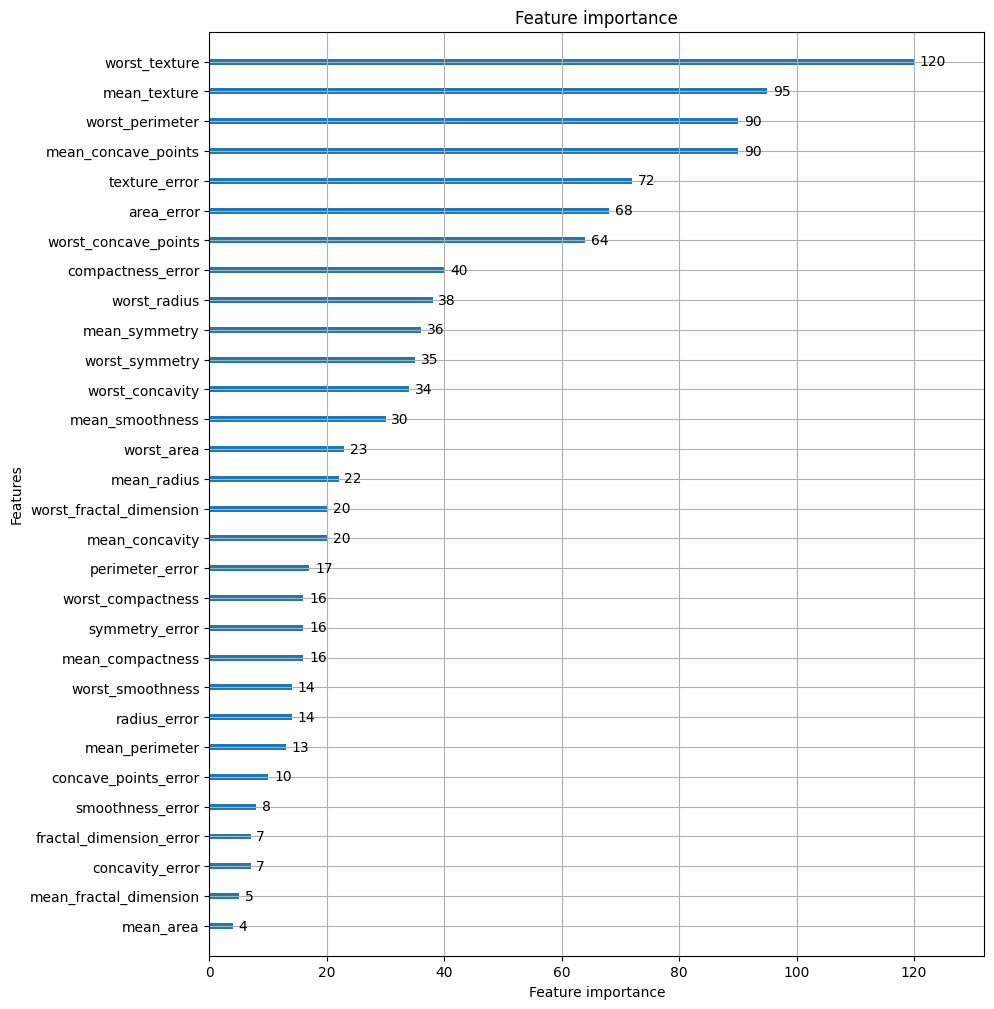

In [150]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
##  %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것 


fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper, ax = ax)

### 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

- 지금까지 하이퍼 파라미터 튜잉을 위해 Grid Search 방식을 적용함
- Grid Search 방식은 튜닝해야 할 파라미터 개수가 많을 경우 최적화 수행 시간이 오래 걸린다는 단점이 있음
- 개별 하이퍼 파라미터 값의 범위가 넓거나 학습 데이터가 대용량일 경우 최적화 시간이 더욱 늘어남

- 실무의 대용량 학습 데이터에 XGBoost나 LightGBM의 하이퍼 파라미터 튜닝 시에 Grid Search 방식보다는 다른 방식을 적용하곤 하는데 대표적으로 베이지안 최적화 기법이 있음

### 베이지안 최적화 개요

- 베이지안 최적화는 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식
- 베이지안 확률에 기반을 둔 최적화 기법
- 베이지안 확률이 새로운 사건의 관측이나 새로운 샘플 데이터를 기반으로 사후 확률을 개선해 나가듯이, 베이지안 최적화는 새로운 데이터를 입력받았을 때 회적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만들어냄

- 베이지안 최적화 구성 요소 메인 2개 : 대체 모델(Surrogate Model), 획득 함수(Acquisition Function)
- 대체 모델 : 획득 함수로부터 최적 함수를 예측할 수 있는 입력값을 추천받은 뒤 이를 기반으로 최적 함수 모델을 개선해나감
- 획득 함수 : 개선된 대체 모델을 기반으로 최적 입력값 계산
- 대체 모델은 획득 함수가 계산한 하이퍼 파라미터를 입력받으면서 점차적으로 개선되며, 개선된 대체 모델을 기반으로 획득 함수는 더 정확한 하이퍼 파라미터를 계산할 수 있음

베이지안 최적화 단계
- step 1) 최초에 랜덤하게 하이퍼 파라미터들을 샘플링하고 성능 결과 관측
- step 2) 관측된 값을 기반으로 대체 모델은 최적 함수를 추정함
- step 3) 추정된 최적 함수를 기반으로 획득 함수는 다음으로 관측할 하이퍼 파라미터 값을 계산함(이전 최적 관측값보다 더 큰 최댓값을 가질 가능성이 높은 지점을 찾아서 다음에 관측할 하이퍼 파라미터를 대체 모델에 전달함
- step 4) 획득 함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델은 갱신되어 다시 최적 함수를 예측                                           

### HyperOpt 사용하기

- 베이지안 최적화를 머신러닝 모델의 하이퍼 파라미터 튜닝에 적용할 수 있게 제공되는 여러 파이썬 패키지들이 있는데 대표적으로는 HyperOpt, Bayesian Optimization, Optuna 등이 있음

HyperOpt 주요 로직
- 입력 변수명과 입력값의 검색 공간 설정(Search Space) - 변수 범위 정함
- 둘째는 목적 함수(Objective Function)의 설정 - 목적함수 = 비용함수 = 손실함수
- 마지막으로 목적 함수의 반환 최솟값을 가지는 최적 입력값을 유추하는 것


- HyperOpt를 사용할 때 유의할 점은 다른 패키지와 다르게 목적 함수 반환값의 최댓값이 아닌 최솟값을 가지는 최적 입력값을 유추한다는 점

In [27]:
pip install hyperopt


     ---------------------------------------- 1.6/1.6 MB 11.2 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 16.1 MB/s eta 0:00:00
     ------------------------------------- 829.2/829.2 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 200.5/200.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=4859bacf3b0fc6e9975af588dfefa36548a9c0c2da6d5ad15023e997734df3b7
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\22\73\06\557dc4f4ef68179b9d763930d6eec26b88ed7c389b19588a1c
Successfully built future


In [151]:
##### 1. 범위 설정 #####
#########################

from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정
# hp모듈을 이용하여 입력 변수명과 입력값의 검색 공간을 설정하는 함수 hp.quniform
# hp.quniform('x', -10, 10, 1) --> x = [-10, -9, -8, -7, ... 8, 9, 10]

search_space = {'x' : hp.quniform('x', -10, 10, 1), 'y' : hp.quniform('y', -15, 15, 1)}

#### 입력값의 검색 공간 제공하는 함수들

- hp.quniform(label, low, high, q) : label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최댓값 high까지 q의 간격을 가지고 설정

- hp.uniform(label, low, high) : 최솟값 low에서 최댓값 high까지 정규 분포 형태의 검색 공간 설정

- hp.randint(label, upper) : 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정

- hp.loguniform(label, low, high) : exp(uniform(low, high))값을 반환하며, 반환 값의 log 변환된 값은 정규 분포 형태를 가지는 검색 공간 설정

- hp.choice(label, options) : 검색 값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정. Options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_critrion', ['gini', 'entropy'])과 같이 설정하면 입력 변수 tree_criterion의 값을 'gini'와 'entropy'로 설정하여 입력함

In [153]:
##### 2. 목적 함수 설정 #####
##############################

def objective_func(search_space) :
    x = search_space['x']  ### dictionary였기 때문에 대괄호로 접근
    y = search_space['y']
    retval = x ** 2 - 20 * y
    
    return retval

- 목적 함수는 반드시 변숫값과 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환하는 구조로 만들어져야 함

- 목적 함수의 반환값은 숫자형 단일값 외에도 딕셔너리 형태로 반환할 수 있음
- 딕셔너리 형태로 반환할 경우에 {'loss' : retval, 'status' : STATUS_OK}와 같이 loss와 status 키 값을 설정해서 반환해야 함

In [154]:
############## 3. fmin()으로 x, y 값 찾기 #############
#최적의 입력값을 베이지안 최적화 기법에 기반하여 찾기 #
######################################################

from hyperopt import fmin, tpe, Trials

# 입력 결괏값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals = 5)로 찾아냄
best_01 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 5,
              trials = trial_val, rstate = np.random.default_rng(seed = 0))

print('best: ', best_01)

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 627.57trial/s, best loss: -224.0]
best:  {'x': -4.0, 'y': 12.0}


In [33]:
# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 20,
              trials = trial_val, rstate = np.random.default_rng(seed = 0))

print('best: ', best_02)

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 683.48trial/s, best loss: -296.0]
best:  {'x': 2.0, 'y': 15.0}


In [35]:
# max_evals를 100회로 늘려서 재테스트
best_03 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100,
              trials = trial_val, rstate = np.random.default_rng(seed = 0))

print('best: ', best_03)

100%|█████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 107.88trial/s, best loss: -299.0]
best:  {'x': -1.0, 'y': 15.0}


- gridsearch를 돌리지 않아도 x와 y의 범위를 줄여줌

#### fmin() 함수의 주요 인자

- fn : 위에서 생성한 objective_func와 같은 목적 함수

- space : 위에서 생성한 search_space와 같은 검색 공간 딕셔너리

- algo : 베이지안 최적화 적용 알고리즘. 기본적으로 tpe.suggest이며 이는 HyperOpt의 기본 최적화 알고리즘인 TPE(Tree of Parzen Estimator)를 의미함

- max_evals : 최적 입력값을 찾기 위한 입력값 시도 횟수

- trials : 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용함. Trials 클래스를 객체로 생성한 변수명을 입력

- rstate : fmin()을 수행할 때마다 동일한 결과값을 가질 수 있도록 설정하는 랜덤 시드(seed) 값

In [39]:
best_03.items()

dict_items([('x', 0.0), ('y', 15.0)])

In [46]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 변환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss' : 함수 반환값, 'status' : 반환 상태값}과 같은 딕셔너리임

trial_val.results[:5]

[{'loss': -64.0, 'status': 'ok'},
 {'loss': -184.0, 'status': 'ok'},
 {'loss': 56.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': 61.0, 'status': 'ok'}]

In [50]:
# Trials 객체의 vals 속성에 {'입력변수명' : 개별 수행 시마다 입력된 값 리스트} 형태로 저장됨

trial_val.vals

{'x': [-6.0,
  -4.0,
  4.0,
  -4.0,
  9.0,
  -6.0,
  -4.0,
  4.0,
  -4.0,
  9.0,
  2.0,
  10.0,
  -9.0,
  -8.0,
  -0.0,
  -0.0,
  1.0,
  9.0,
  6.0,
  9.0,
  -2.0,
  2.0,
  3.0,
  6.0,
  2.0,
  6.0,
  -2.0,
  -2.0,
  -2.0,
  -6.0,
  -1.0,
  5.0,
  -7.0,
  -3.0,
  2.0,
  -5.0,
  7.0,
  -10.0,
  3.0,
  -1.0,
  4.0,
  1.0,
  -5.0,
  -3.0,
  8.0,
  -1.0,
  1.0,
  5.0,
  2.0,
  -8.0,
  -3.0,
  -0.0,
  3.0,
  -5.0,
  -4.0,
  5.0,
  1.0,
  4.0,
  -7.0,
  7.0,
  0.0,
  10.0,
  -10.0,
  -2.0,
  -9.0,
  2.0,
  3.0,
  -1.0,
  -1.0,
  -4.0,
  -3.0,
  -1.0,
  -6.0,
  -2.0,
  -5.0,
  -1.0,
  -7.0,
  -0.0,
  1.0,
  -3.0,
  3.0,
  -2.0,
  -5.0,
  4.0,
  -4.0,
  -1.0,
  1.0,
  -2.0,
  4.0,
  0.0,
  5.0,
  -6.0,
  -8.0,
  -4.0,
  7.0,
  -3.0,
  2.0,
  -1.0,
  -2.0,
  0.0,
  -7.0,
  -9.0,
  1.0,
  -3.0,
  -5.0,
  2.0,
  -4.0,
  -6.0,
  6.0,
  3.0,
  -1.0,
  5.0,
  8.0,
  -2.0,
  -0.0,
  -3.0,
  -5.0,
  1.0,
  -4.0,
  -1.0,
  2.0,
  -8.0,
  1.0,
  6.0,
  3.0,
  7.0,
  8.0,
  -0.0,
  -2.0,
  -2.0,
  4.0,
 

In [156]:
## 직관적으로 보기위해 results와 vals 속성값들을 dataframe으로
import pandas as pd

# results에서 loss 키값에 해당하는 value들을 추출하여 list로 생성
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# Dataframe을 생성
result_df = pd.DataFrame({'x' : trial_val.vals['x'], 'y' : trial_val.vals['y'], 'losses' : losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0


### XGBoost + HyperOpt

In [58]:
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [57]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = .2, random_state = 156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = .1, random_state = 156)

In [59]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   } 

In [60]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환

def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK} 

유의사항
- 검색 공간에서 목적 함수로 입력되는 모든 인자들은 실수형 값이므로 이들을 XGBoostClassifier의 정수형 하이퍼 파라미터값으로 설정할 때는 정수형으로 형변환을 해야 함
ex) XGBoostClassifier(max_depth = int(search_space['max_depth']))

- HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 정확도와 같이 값이 클수록 좋은 성능 지표일경우 -1을 곱한 뒤, 반환하여 더 큰 성능 지표가 더 작은 반환값이 되도록 만들어줘야 함

In [157]:
## 유의사항 적용해 목적 함수 만들기
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 serach_space 값으로 입력된 모든 값은 실수형임
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함
# 정확도는 높을수록 더 좋은 수치임. -1*정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변함
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators = 100, 
                            max_depth = int(search_space['max_depth']),
                           min_child_weight = int(search_space['min_child_weight']),
                           learning_rate = search_space['learning_rate'],
                           colsample_bytree = serach_space['colsample_bytree'],
                           eval_metric = 'logloss')
    
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring = 'accuracy', cv = 3)
    
    # accuracy는 cv = 3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함
    return {'loss' : -1 * np.mean(accuracy), 'status' : STATUS_OK}

In [61]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best) 

100%|███████████████████████████████████████████████| 50/50 [00:10<00:00,  4.56trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


- 도출된 최적 하이퍼 파라미터들을 이용해서 XGBClassifier를 재학습한 후, 성능 평가 결과 확인

In [158]:
xgb_wrapper = XGBClassifier(n_estimators = 400,
                           learning_rate = round(best['learning_rate'], 5),
                           max_depth = int(best['max_depth']),
                           min_child_weight = int(best['min_child_weight']),
                           colsample_bytree = round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss',
               eval_set = evals, verbose = True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.59055	validation_1-logloss:0.59162
[1]	validation_0-logloss:0.51058	validation_1-logloss:0.51292
[2]	validation_0-logloss:0.44706	validation_1-logloss:0.45014
[3]	validation_0-logloss:0.39492	validation_1-logloss:0.39942
[4]	validation_0-logloss:0.35192	validation_1-logloss:0.35780
[5]	validation_0-logloss:0.31701	validation_1-logloss:0.32351
[6]	validation_0-logloss:0.28682	validation_1-logloss:0.29459
[7]	validation_0-logloss:0.26125	validation_1-logloss:0.27038
[8]	validation_0-logloss:0.23958	validation_1-logloss:0.25000
[9]	validation_0-logloss:0.22194	validation_1-logloss:0.23310
[10]	validation_0-logloss:0.20677	validation_1-logloss:0.21883
[11]	validation_0-logloss:0.19327	validation_1-logloss:0.20682
[12]	validation_0-logloss:0.18141	validation_1-logloss:0.19608
[13]	validation_0-logloss:0.17060	validation_1-logloss:0.18705
[14]	validation_0-logloss:0.16157	validation_1-logloss:0.17924
[15]	validation_0-logloss:0.15381	validation_1-logloss:0.17307
[1

## 분류 실습 - 캐글 산탄데르 고객 만족 예측

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

- 데이터 열기 및 파악

In [99]:
df = pd.read_csv('./data/train_santander.csv')
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [101]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [103]:
## df['target']에서 0과 1의 퍼센트는?
df['TARGET'].value_counts()/len(df)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

In [105]:
df['var3'].min()

-999999

- 데이터 전처리

In [160]:
### 다른 값에 비해 편차가 너무 심하므로 -999999를 가장 값이 많은 2로 바꾸기
df['var3'].replace(-999999, 2, inplace = True)

In [109]:
### ID 칼럼 제거
df.drop(['ID'], axis = 1, inplace = True)
df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


- 클래스 데이터 세트와 피처 데이터 세트 분리해 별도의 데이터 세트로 저장하기

In [114]:
### df['TARGET']과 나머지 분리
X = features = df.drop(['TARGET'], axis = 1)
y = labels = df['TARGET']

In [118]:
X.shape

(76020, 369)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

- 비대칭한 데이터 세트이므로 클래스인 Target 값 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출됐는지 확인

In [123]:
y_train.value_counts() / len(y_train)

0    0.960964
1    0.039036
Name: TARGET, dtype: float64

In [124]:
y_test.value_counts() / len(y_test)

0    0.9583
1    0.0417
Name: TARGET, dtype: float64

In [125]:
### early stopping을 위해 검증 데이터 세트 나누기
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = .3, random_state = 0)

### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [127]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random_state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, random_state = 156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc', 
            eval_set = [(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC : ', xgb_roc_score)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81004
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

In [132]:
pred = xgb_clf.predict(X_test)

accuracy_score(y_test, pred)

0.9583004472507235

In [133]:
roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])

0.842853493090032

In [162]:
## 1. 검색 공간(범위) 설정
from hyperopt import hp

# max_depth는 5에서 15까지 1 간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2) 
                   }

In [163]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

## 2. 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth'])
                           , min_child_weight=int(search_space['min_child_weight'])
                            , colsample_bytree=search_space['colsample_bytree']
                            , learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                   , eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list) 

In [138]:
# 최적의 하이퍼 파라미터 도출

from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best) 

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81678	validation_1-auc:0.79160                                                                  
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688                                                                  
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572                                                                  
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095                                                                  
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989                                                                  
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978                                                                  
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042                                                                  
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116                                                                  
[8]	validation_0-auc:0.84224	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81645	validation_1-auc:0.80415                                                                  
[1]	validation_0-auc:0.82149	validation_1-auc:0.80712                                                                  
[2]	validation_0-auc:0.83100	validation_1-auc:0.82058                                                                  
[3]	validation_0-auc:0.83162	validation_1-auc:0.81977                                                                  
[4]	validation_0-auc:0.83682	validation_1-auc:0.81846                                                                  
[5]	validation_0-auc:0.83858	validation_1-auc:0.82111                                                                  
[6]	validation_0-auc:0.84021	validation_1-auc:0.82048                                                                  
[7]	validation_0-auc:0.84093	validation_1-auc:0.82130                                                                  
[8]	validation_0-auc:0.84181	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82722	validation_1-auc:0.81055                                                                  
[1]	validation_0-auc:0.83004	validation_1-auc:0.81294                                                                  
[2]	validation_0-auc:0.83657	validation_1-auc:0.81821                                                                  
[3]	validation_0-auc:0.83902	validation_1-auc:0.81736                                                                  
[4]	validation_0-auc:0.84061	validation_1-auc:0.81876                                                                  
[5]	validation_0-auc:0.84373	validation_1-auc:0.82262                                                                  
[6]	validation_0-auc:0.84346	validation_1-auc:0.82117                                                                  
[7]	validation_0-auc:0.84401	validation_1-auc:0.82159                                                                  
[8]	validation_0-auc:0.84546	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82774	validation_1-auc:0.80070                                                                  
[1]	validation_0-auc:0.83281	validation_1-auc:0.80392                                                                  
[2]	validation_0-auc:0.83808	validation_1-auc:0.80674                                                                  
[3]	validation_0-auc:0.84214	validation_1-auc:0.80910                                                                  
[4]	validation_0-auc:0.84461	validation_1-auc:0.81348                                                                  
[5]	validation_0-auc:0.84588	validation_1-auc:0.81084                                                                  
[6]	validation_0-auc:0.84961	validation_1-auc:0.81557                                                                  
[7]	validation_0-auc:0.85247	validation_1-auc:0.81735                                                                  
[8]	validation_0-auc:0.85333	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82128	validation_1-auc:0.80603                                                                  
[1]	validation_0-auc:0.82734	validation_1-auc:0.80820                                                                  
[2]	validation_0-auc:0.83693	validation_1-auc:0.81837                                                                  
[3]	validation_0-auc:0.84076	validation_1-auc:0.82377                                                                  
[4]	validation_0-auc:0.84675	validation_1-auc:0.82426                                                                  
[5]	validation_0-auc:0.84979	validation_1-auc:0.82363                                                                  
[6]	validation_0-auc:0.85384	validation_1-auc:0.82628                                                                  
[7]	validation_0-auc:0.85475	validation_1-auc:0.82713                                                                  
[8]	validation_0-auc:0.85587	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83112	validation_1-auc:0.81268                                                                  
[1]	validation_0-auc:0.83682	validation_1-auc:0.81355                                                                  
[2]	validation_0-auc:0.84258	validation_1-auc:0.81920                                                                  
[3]	validation_0-auc:0.84275	validation_1-auc:0.81851                                                                  
[4]	validation_0-auc:0.84851	validation_1-auc:0.81928                                                                  
[5]	validation_0-auc:0.85510	validation_1-auc:0.82100                                                                  
[6]	validation_0-auc:0.85611	validation_1-auc:0.82251                                                                  
[7]	validation_0-auc:0.85814	validation_1-auc:0.82231                                                                  
[8]	validation_0-auc:0.85953	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82657	validation_1-auc:0.80149                                                                  
[1]	validation_0-auc:0.83724	validation_1-auc:0.80530                                                                  
[2]	validation_0-auc:0.84620	validation_1-auc:0.81009                                                                  
[3]	validation_0-auc:0.84867	validation_1-auc:0.81020                                                                  
[4]	validation_0-auc:0.85292	validation_1-auc:0.81531                                                                  
[5]	validation_0-auc:0.85540	validation_1-auc:0.81681                                                                  
[6]	validation_0-auc:0.85916	validation_1-auc:0.81716                                                                  
[7]	validation_0-auc:0.86259	validation_1-auc:0.81789                                                                  
[8]	validation_0-auc:0.86617	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82424	validation_1-auc:0.80450                                                                  
[1]	validation_0-auc:0.83668	validation_1-auc:0.81505                                                                  
[2]	validation_0-auc:0.84661	validation_1-auc:0.82324                                                                  
[3]	validation_0-auc:0.84859	validation_1-auc:0.82247                                                                  
[4]	validation_0-auc:0.85266	validation_1-auc:0.82327                                                                  
[5]	validation_0-auc:0.85659	validation_1-auc:0.82284                                                                  
[6]	validation_0-auc:0.86155	validation_1-auc:0.82378                                                                  
[7]	validation_0-auc:0.86509	validation_1-auc:0.82397                                                                  
[8]	validation_0-auc:0.87084	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83493	validation_1-auc:0.81063                                                                  
[1]	validation_0-auc:0.84197	validation_1-auc:0.81316                                                                  
[2]	validation_0-auc:0.85026	validation_1-auc:0.81739                                                                  
[3]	validation_0-auc:0.85484	validation_1-auc:0.81605                                                                  
[4]	validation_0-auc:0.85947	validation_1-auc:0.81763                                                                  
[5]	validation_0-auc:0.86117	validation_1-auc:0.81876                                                                  
[6]	validation_0-auc:0.86492	validation_1-auc:0.82089                                                                  
[7]	validation_0-auc:0.86831	validation_1-auc:0.82248                                                                  
[8]	validation_0-auc:0.87071	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82822	validation_1-auc:0.80085                                                                  
[1]	validation_0-auc:0.83452	validation_1-auc:0.80298                                                                  
[2]	validation_0-auc:0.83879	validation_1-auc:0.80562                                                                  
[3]	validation_0-auc:0.84177	validation_1-auc:0.80715                                                                  
[4]	validation_0-auc:0.84381	validation_1-auc:0.80986                                                                  
[5]	validation_0-auc:0.84400	validation_1-auc:0.80852                                                                  
[6]	validation_0-auc:0.84627	validation_1-auc:0.81028                                                                  
[7]	validation_0-auc:0.85133	validation_1-auc:0.81525                                                                  
[8]	validation_0-auc:0.85175	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82234	validation_1-auc:0.80555                                                                  
[1]	validation_0-auc:0.82821	validation_1-auc:0.80812                                                                  
[2]	validation_0-auc:0.83272	validation_1-auc:0.81079                                                                  
[3]	validation_0-auc:0.83784	validation_1-auc:0.82045                                                                  
[4]	validation_0-auc:0.84577	validation_1-auc:0.82188                                                                  
[5]	validation_0-auc:0.84814	validation_1-auc:0.82236                                                                  
[6]	validation_0-auc:0.85202	validation_1-auc:0.82448                                                                  
[7]	validation_0-auc:0.85363	validation_1-auc:0.82626                                                                  
[8]	validation_0-auc:0.85501	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83132	validation_1-auc:0.81167                                                                  
[1]	validation_0-auc:0.83662	validation_1-auc:0.81285                                                                  
[2]	validation_0-auc:0.84048	validation_1-auc:0.81616                                                                  
[3]	validation_0-auc:0.84220	validation_1-auc:0.81680                                                                  
[4]	validation_0-auc:0.84545	validation_1-auc:0.81751                                                                  
[5]	validation_0-auc:0.85363	validation_1-auc:0.82067                                                                  
[6]	validation_0-auc:0.85464	validation_1-auc:0.82229                                                                  
[7]	validation_0-auc:0.85629	validation_1-auc:0.82187                                                                  
[8]	validation_0-auc:0.85654	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82730	validation_1-auc:0.80139                                                                  
[1]	validation_0-auc:0.84185	validation_1-auc:0.80782                                                                  
[2]	validation_0-auc:0.84905	validation_1-auc:0.81110                                                                  
[3]	validation_0-auc:0.85357	validation_1-auc:0.81297                                                                  
[4]	validation_0-auc:0.85984	validation_1-auc:0.81412                                                                  
[5]	validation_0-auc:0.86445	validation_1-auc:0.81503                                                                  
[6]	validation_0-auc:0.86836	validation_1-auc:0.81527                                                                  
[7]	validation_0-auc:0.87144	validation_1-auc:0.81559                                                                  
[8]	validation_0-auc:0.87841	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82403	validation_1-auc:0.80542                                                                  
[1]	validation_0-auc:0.83752	validation_1-auc:0.81644                                                                  
[2]	validation_0-auc:0.84646	validation_1-auc:0.82204                                                                  
[3]	validation_0-auc:0.85356	validation_1-auc:0.82355                                                                  
[4]	validation_0-auc:0.85684	validation_1-auc:0.82385                                                                  
[5]	validation_0-auc:0.86408	validation_1-auc:0.82520                                                                  
[6]	validation_0-auc:0.86996	validation_1-auc:0.82501                                                                  
[7]	validation_0-auc:0.87481	validation_1-auc:0.82853                                                                  
[8]	validation_0-auc:0.87960	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83591	validation_1-auc:0.80958                                                                  
[1]	validation_0-auc:0.84347	validation_1-auc:0.81172                                                                  
[2]	validation_0-auc:0.85065	validation_1-auc:0.81595                                                                  
[3]	validation_0-auc:0.85812	validation_1-auc:0.81956                                                                  
[4]	validation_0-auc:0.86408	validation_1-auc:0.82143                                                                  
[5]	validation_0-auc:0.86731	validation_1-auc:0.82281                                                                  
[6]	validation_0-auc:0.87105	validation_1-auc:0.82461                                                                  
[7]	validation_0-auc:0.87499	validation_1-auc:0.82682                                                                  
[8]	validation_0-auc:0.88082	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82360	validation_1-auc:0.80052                                                                  
[1]	validation_0-auc:0.82942	validation_1-auc:0.80498                                                                  
[2]	validation_0-auc:0.83477	validation_1-auc:0.80715                                                                  
[3]	validation_0-auc:0.83989	validation_1-auc:0.81232                                                                  
[4]	validation_0-auc:0.84115	validation_1-auc:0.81348                                                                  
[5]	validation_0-auc:0.84452	validation_1-auc:0.81346                                                                  
[6]	validation_0-auc:0.84443	validation_1-auc:0.81594                                                                  
[7]	validation_0-auc:0.84529	validation_1-auc:0.81613                                                                  
[8]	validation_0-auc:0.84627	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81887	validation_1-auc:0.80602                                                                  
[1]	validation_0-auc:0.82432	validation_1-auc:0.80828                                                                  
[2]	validation_0-auc:0.83499	validation_1-auc:0.82019                                                                  
[3]	validation_0-auc:0.83655	validation_1-auc:0.82047                                                                  
[4]	validation_0-auc:0.83983	validation_1-auc:0.81922                                                                  
[5]	validation_0-auc:0.84165	validation_1-auc:0.82002                                                                  
[6]	validation_0-auc:0.84634	validation_1-auc:0.82398                                                                  
[7]	validation_0-auc:0.84823	validation_1-auc:0.82655                                                                  
[8]	validation_0-auc:0.84958	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 10%|████▊                                           | 5/50 [04:24<39:40, 52.89s/trial, best loss: -0.8358993926439547]


KeyboardInterrupt: 

In [165]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators = 500,
                       learning_rate = round(best['learning_rate'], 5),
                       max_depth = int(best['max_depth']),
                       min_child_weight = int(best['min_child_weight']),
                       colsample_bytree = round(best['colsample_bytree'], 5)
                       )

# evaluation metric을 auc로, early stopping을 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100,
           eval_metric = 'auc', eval_set = [(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC : ', xgb_roc_score)

[0]	validation_0-auc:0.83085	validation_1-auc:0.80869
[1]	validation_0-auc:0.84648	validation_1-auc:0.81221
[2]	validation_0-auc:0.85291	validation_1-auc:0.81391
[3]	validation_0-auc:0.85611	validation_1-auc:0.81267
[4]	validation_0-auc:0.86631	validation_1-auc:0.81534
[5]	validation_0-auc:0.87250	validation_1-auc:0.81584
[6]	validation_0-auc:0.88085	validation_1-auc:0.81903
[7]	validation_0-auc:0.88519	validation_1-auc:0.81867
[8]	validation_0-auc:0.88793	validation_1-auc:0.81876
[9]	validation_0-auc:0.89081	validation_1-auc:0.81892
[10]	validation_0-auc:0.89294	validation_1-auc:0.81713
[11]	validation_0-auc:0.89655	validation_1-auc:0.81540
[12]	validation_0-auc:0.90027	validation_1-auc:0.81716
[13]	validation_0-auc:0.90589	validation_1-auc:0.81846
[14]	validation_0-auc:0.90862	validation_1-auc:0.82056
[15]	validation_0-auc:0.91242	validation_1-auc:0.81898
[16]	validation_0-auc:0.91546	validation_1-auc:0.82023
[17]	validation_0-auc:0.92298	validation_1-auc:0.82063
[18]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

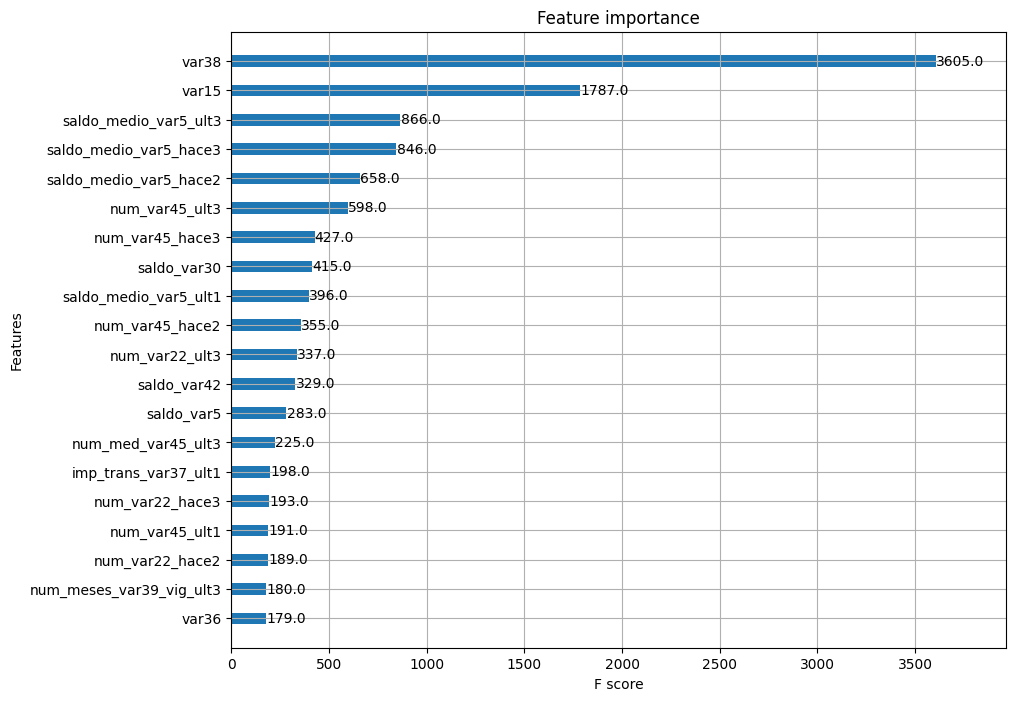

In [166]:
### 각 피처의 중요도 그래프
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

### LightGBM + HyperOpt

In [141]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC :', lgbm_roc_score)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

In [142]:
lgbm_search_space = {'num_leaves' : hp.quniform('num_leaves', 32, 64, 1),
                    'max_depth' : hp.quniform('max_depth', 100, 160, 1),
                    'min_child_samples' : hp.quniform('min_child_samples', 60, 100, 1),
                    'subsample' : hp.uniform('subsample', 0.7, 1),
                    'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [167]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators = 100,
                             num_leaves = int(search_space['num_leaves']),
                             max_depth = int(search_space['max_depth']),
                             min_child_samples = int(search_space['min_child_samples']),
                             subsample = search_space['subsample'],
                             learning_rate = search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 리스트
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits = 3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = 'auc',
                    eval_set = [(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1*np.mean(roc_auc_list)

In [168]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn = objective_func, space = lgbm_search_space, algo = tpe.suggest,
           max_evals = 50, # 최대 반복 횟수를 지정
           trials = trials, rstate = np.random.default_rng(seed = 30))

print('best : ', best)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's auc: 0.841859	training's binary_logloss: 0.151499	valid_1's auc: 0.814773	valid_1's binary_logloss: 0.154617
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826374	training's binary_logloss: 0.164747	valid_1's auc: 0.813652	valid_1's binary_logloss: 0.158892
[2]	training's auc: 0.828688	training's binary_logloss: 0.16274	valid_1's auc: 0.814697	valid_1's binary_logloss: 0.157243
[3]	training's auc: 0.831453	training's binary_logloss: 0.160948	valid_1's auc: 0.817983	valid_1's binary_logloss: 0.155679
[4]	training's auc: 0.832427	training's binary_logloss: 0.159315	valid_1's auc: 0.818151	valid_1's binary_logloss: 0.154326
[5]	training's auc: 0.835396	training's binary_logloss: 0.1578	valid_1's auc: 0.81967	valid_1's binary_logloss: 0.153072
[6]	training's auc: 0.838759	training's binary_logloss: 0.156414	valid_1's auc: 0.821771	valid_1's binary_logloss: 0.15188
[7]	training's auc: 0.840479	training's binary_logloss: 0.155141	valid_1's auc: 0.824454	valid_1's binary_logloss: 0.150827
[8]	training's auc: 0.84112	training's binary_logloss: 0.153937	valid_1's auc: 0.824531	valid_1's binary_logloss: 0.149835
[9]	training's

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827078	training's binary_logloss: 0.160957	valid_1's auc: 0.806826	valid_1's binary_logloss: 0.166539
[2]	training's auc: 0.829428	training's binary_logloss: 0.159062	valid_1's auc: 0.81121	valid_1's binary_logloss: 0.1647
[3]	training's auc: 0.834189	training's binary_logloss: 0.157388	valid_1's auc: 0.814212	valid_1's binary_logloss: 0.163126
[4]	training's auc: 0.834898	training's binary_logloss: 0.15584	valid_1's auc: 0.816332	valid_1's binary_logloss: 0.161663
[5]	training's auc: 0.836613	training's binary_logloss: 0.154385	valid_1's auc: 0.817578	valid_1's binary_logloss: 0.160308
[6]	training's auc: 0.837141	training's binary_logloss: 0.153051	valid_1's auc: 0.817975	valid_1's binary_logloss: 0.159098
[7]	training's auc: 0.84037	training's binary_logloss: 0.15182	valid_1's auc: 0.821337	valid_1's binary_logloss: 0.157941
[8]	training's auc: 0.841178	training's binary_logloss: 0.150681	valid_1's auc: 0.821845	valid_1's binary_logloss: 0.156842
[9]	training's

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840138	training's binary_logloss: 0.15221	valid_1's auc: 0.812785	valid_1's binary_logloss: 0.155558
[2]	training's auc: 0.84777	training's binary_logloss: 0.145745	valid_1's auc: 0.815828	valid_1's binary_logloss: 0.150616
[3]	training's auc: 0.857571	training's binary_logloss: 0.141216	valid_1's auc: 0.821962	valid_1's binary_logloss: 0.147259
[4]	training's auc: 0.861358	training's binary_logloss: 0.137643	valid_1's auc: 0.824181	valid_1's binary_logloss: 0.144869
[5]	training's auc: 0.866559	training's binary_logloss: 0.134811	valid_1's auc: 0.825962	valid_1's binary_logloss: 0.14308
[6]	training's auc: 0.869278	training's binary_logloss: 0.132436	valid_1's auc: 0.827506	valid_1's binary_logloss: 0.141548
[7]	training's auc: 0.872721	training's binary_logloss: 0.130404	valid_1's auc: 0.829742	valid_1's binary_logloss: 0.1403
[8]	training's auc: 0.876014	training's binary_logloss: 0.128648	valid_1's auc: 0.830458	valid_1's binary_logloss: 0.139332
[9]	training'

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.835385	training's binary_logloss: 0.155035	valid_1's auc: 0.820986	valid_1's binary_logloss: 0.151103
[2]	training's auc: 0.843742	training's binary_logloss: 0.148306	valid_1's auc: 0.823826	valid_1's binary_logloss: 0.146172
[3]	training's auc: 0.853372	training's binary_logloss: 0.143655	valid_1's auc: 0.829	valid_1's binary_logloss: 0.14287
[4]	training's auc: 0.859239	training's binary_logloss: 0.140159	valid_1's auc: 0.831548	valid_1's binary_logloss: 0.140399
[5]	training's auc: 0.864747	training's binary_logloss: 0.137227	valid_1's auc: 0.832085	valid_1's binary_logloss: 0.138509
[6]	training's auc: 0.867488	training's binary_logloss: 0.134833	valid_1's auc: 0.833908	valid_1's binary_logloss: 0.136874
[7]	training's auc: 0.871497	training's binary_logloss: 0.132791	valid_1's auc: 0.834228	valid_1's binary_logloss: 0.135671
[8]	training's auc: 0.872984	training's binary_logloss: 0.131078	valid_1's auc: 0.834811	valid_1's binary_logloss: 0.134752
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.833555	training's binary_logloss: 0.151597	valid_1's auc: 0.810326	valid_1's binary_logloss: 0.158643
[2]	training's auc: 0.846544	training's binary_logloss: 0.145078	valid_1's auc: 0.816486	valid_1's binary_logloss: 0.153114
[3]	training's auc: 0.853639	training's binary_logloss: 0.140283	valid_1's auc: 0.821862	valid_1's binary_logloss: 0.149441
[4]	training's auc: 0.859777	training's binary_logloss: 0.13683	valid_1's auc: 0.824145	valid_1's binary_logloss: 0.146764
[5]	training's auc: 0.863141	training's binary_logloss: 0.133972	valid_1's auc: 0.824348	valid_1's binary_logloss: 0.144863
[6]	training's auc: 0.86626	training's binary_logloss: 0.13162	valid_1's auc: 0.826186	valid_1's binary_logloss: 0.143307
[7]	training's auc: 0.869463	training's binary_logloss: 0.129614	valid_1's auc: 0.82667	valid_1's binary_logloss: 0.142102
[8]	training's auc: 0.872344	training's binary_logloss: 0.127958	valid_1's auc: 0.8277	valid_1's binary_logloss: 0.141201
[9]	training's

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839116	training's binary_logloss: 0.158407	valid_1's auc: 0.808457	valid_1's binary_logloss: 0.160442
[2]	training's auc: 0.84236	training's binary_logloss: 0.153995	valid_1's auc: 0.808509	valid_1's binary_logloss: 0.156958
[3]	training's auc: 0.845859	training's binary_logloss: 0.150591	valid_1's auc: 0.811508	valid_1's binary_logloss: 0.154196
[4]	training's auc: 0.852968	training's binary_logloss: 0.147664	valid_1's auc: 0.81863	valid_1's binary_logloss: 0.151787
[5]	training's auc: 0.855483	training's binary_logloss: 0.145139	valid_1's auc: 0.820538	valid_1's binary_logloss: 0.149919
[6]	training's auc: 0.856827	training's binary_logloss: 0.14298	valid_1's auc: 0.821063	valid_1's binary_logloss: 0.148333
[7]	training's auc: 0.858639	training's binary_logloss: 0.14107	valid_1's auc: 0.821902	valid_1's binary_logloss: 0.146983
[8]	training's auc: 0.859908	training's binary_logloss: 0.139361	valid_1's auc: 0.822497	valid_1's binary_logloss: 0.145726
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.835511	training's binary_logloss: 0.160929	valid_1's auc: 0.819654	valid_1's binary_logloss: 0.155831
[2]	training's auc: 0.840626	training's binary_logloss: 0.156494	valid_1's auc: 0.822946	valid_1's binary_logloss: 0.152183
[3]	training's auc: 0.844525	training's binary_logloss: 0.152878	valid_1's auc: 0.825064	valid_1's binary_logloss: 0.149383
[4]	training's auc: 0.851467	training's binary_logloss: 0.149991	valid_1's auc: 0.829936	valid_1's binary_logloss: 0.147084
[5]	training's auc: 0.854447	training's binary_logloss: 0.147533	valid_1's auc: 0.83216	valid_1's binary_logloss: 0.14519
[6]	training's auc: 0.857472	training's binary_logloss: 0.145319	valid_1's auc: 0.833905	valid_1's binary_logloss: 0.143543
[7]	training's auc: 0.860339	training's binary_logloss: 0.143397	valid_1's auc: 0.834078	valid_1's binary_logloss: 0.142131
[8]	training's auc: 0.861304	training's binary_logloss: 0.141745	valid_1's auc: 0.834468	valid_1's binary_logloss: 0.140892
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834503	training's binary_logloss: 0.157399	valid_1's auc: 0.813411	valid_1's binary_logloss: 0.163404
[2]	training's auc: 0.839454	training's binary_logloss: 0.153182	valid_1's auc: 0.819011	valid_1's binary_logloss: 0.159561
[3]	training's auc: 0.846944	training's binary_logloss: 0.149714	valid_1's auc: 0.826293	valid_1's binary_logloss: 0.156293
[4]	training's auc: 0.851065	training's binary_logloss: 0.146888	valid_1's auc: 0.826033	valid_1's binary_logloss: 0.153789
[5]	training's auc: 0.852662	training's binary_logloss: 0.14446	valid_1's auc: 0.826574	valid_1's binary_logloss: 0.151732
[6]	training's auc: 0.855441	training's binary_logloss: 0.142282	valid_1's auc: 0.828235	valid_1's binary_logloss: 0.149964
[7]	training's auc: 0.856989	training's binary_logloss: 0.140392	valid_1's auc: 0.828256	valid_1's binary_logloss: 0.148457
[8]	training's auc: 0.859909	training's binary_logloss: 0.138736	valid_1's auc: 0.828911	valid_1's binary_logloss: 0.14717
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842505	training's binary_logloss: 0.154575	valid_1's auc: 0.808054	valid_1's binary_logloss: 0.157515
[2]	training's auc: 0.84905	training's binary_logloss: 0.148601	valid_1's auc: 0.812705	valid_1's binary_logloss: 0.152991
[3]	training's auc: 0.858257	training's binary_logloss: 0.144161	valid_1's auc: 0.818699	valid_1's binary_logloss: 0.149736
[4]	training's auc: 0.861388	training's binary_logloss: 0.140701	valid_1's auc: 0.822829	valid_1's binary_logloss: 0.147176
[5]	training's auc: 0.863741	training's binary_logloss: 0.137779	valid_1's auc: 0.824119	valid_1's binary_logloss: 0.145182
[6]	training's auc: 0.867855	training's binary_logloss: 0.135354	valid_1's auc: 0.824776	valid_1's binary_logloss: 0.143786
[7]	training's auc: 0.871623	training's binary_logloss: 0.13321	valid_1's auc: 0.826166	valid_1's binary_logloss: 0.14244
[8]	training's auc: 0.873921	training's binary_logloss: 0.131346	valid_1's auc: 0.827566	valid_1's binary_logloss: 0.141253
[9]	trainin

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837198	training's binary_logloss: 0.157173	valid_1's auc: 0.819819	valid_1's binary_logloss: 0.153053
[2]	training's auc: 0.846143	training's binary_logloss: 0.150948	valid_1's auc: 0.824533	valid_1's binary_logloss: 0.148361
[3]	training's auc: 0.855841	training's binary_logloss: 0.146394	valid_1's auc: 0.830547	valid_1's binary_logloss: 0.145049
[4]	training's auc: 0.860602	training's binary_logloss: 0.142819	valid_1's auc: 0.830676	valid_1's binary_logloss: 0.142575
[5]	training's auc: 0.863461	training's binary_logloss: 0.139988	valid_1's auc: 0.831777	valid_1's binary_logloss: 0.140612
[6]	training's auc: 0.869579	training's binary_logloss: 0.137439	valid_1's auc: 0.832399	valid_1's binary_logloss: 0.138964
[7]	training's auc: 0.872434	training's binary_logloss: 0.135255	valid_1's auc: 0.833923	valid_1's binary_logloss: 0.137628
[8]	training's auc: 0.875089	training's binary_logloss: 0.133378	valid_1's auc: 0.833948	valid_1's binary_logloss: 0.136537
[9]	trai

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839507	training's binary_logloss: 0.15372	valid_1's auc: 0.813992	valid_1's binary_logloss: 0.160635
[2]	training's auc: 0.848498	training's binary_logloss: 0.147776	valid_1's auc: 0.821284	valid_1's binary_logloss: 0.155561
[3]	training's auc: 0.857619	training's binary_logloss: 0.143331	valid_1's auc: 0.82337	valid_1's binary_logloss: 0.151964
[4]	training's auc: 0.861851	training's binary_logloss: 0.139678	valid_1's auc: 0.82534	valid_1's binary_logloss: 0.149262
[5]	training's auc: 0.865752	training's binary_logloss: 0.136765	valid_1's auc: 0.827254	valid_1's binary_logloss: 0.147084
[6]	training's auc: 0.868268	training's binary_logloss: 0.134361	valid_1's auc: 0.827763	valid_1's binary_logloss: 0.145391
[7]	training's auc: 0.870669	training's binary_logloss: 0.132206	valid_1's auc: 0.827993	valid_1's binary_logloss: 0.144066
[8]	training's auc: 0.87337	training's binary_logloss: 0.130415	valid_1's auc: 0.828218	valid_1's binary_logloss: 0.143004
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839988	training's binary_logloss: 0.158915	valid_1's auc: 0.80402	valid_1's binary_logloss: 0.160845
[2]	training's auc: 0.845611	training's binary_logloss: 0.15473	valid_1's auc: 0.808466	valid_1's binary_logloss: 0.157503
[3]	training's auc: 0.850413	training's binary_logloss: 0.151467	valid_1's auc: 0.81197	valid_1's binary_logloss: 0.154969
[4]	training's auc: 0.854082	training's binary_logloss: 0.148694	valid_1's auc: 0.815343	valid_1's binary_logloss: 0.152791
[5]	training's auc: 0.858498	training's binary_logloss: 0.146257	valid_1's auc: 0.818991	valid_1's binary_logloss: 0.150852
[6]	training's auc: 0.860564	training's binary_logloss: 0.144088	valid_1's auc: 0.821491	valid_1's binary_logloss: 0.149217
[7]	training's auc: 0.861725	training's binary_logloss: 0.142182	valid_1's auc: 0.822291	valid_1's binary_logloss: 0.147829
[8]	training's auc: 0.863498	training's binary_logloss: 0.140436	valid_1's auc: 0.824234	valid_1's binary_logloss: 0.146526
[9]	trainin

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836609	training's binary_logloss: 0.161338	valid_1's auc: 0.815477	valid_1's binary_logloss: 0.156299
[2]	training's auc: 0.842726	training's binary_logloss: 0.157153	valid_1's auc: 0.820686	valid_1's binary_logloss: 0.152792
[3]	training's auc: 0.846403	training's binary_logloss: 0.15377	valid_1's auc: 0.82216	valid_1's binary_logloss: 0.150098
[4]	training's auc: 0.852579	training's binary_logloss: 0.150957	valid_1's auc: 0.828798	valid_1's binary_logloss: 0.147805
[5]	training's auc: 0.856698	training's binary_logloss: 0.148509	valid_1's auc: 0.830437	valid_1's binary_logloss: 0.145963
[6]	training's auc: 0.859482	training's binary_logloss: 0.146373	valid_1's auc: 0.831649	valid_1's binary_logloss: 0.144443
[7]	training's auc: 0.861336	training's binary_logloss: 0.14448	valid_1's auc: 0.831881	valid_1's binary_logloss: 0.143066
[8]	training's auc: 0.861845	training's binary_logloss: 0.142803	valid_1's auc: 0.832382	valid_1's binary_logloss: 0.141842
[9]	trainin

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.838009	training's binary_logloss: 0.15785	valid_1's auc: 0.816064	valid_1's binary_logloss: 0.163853
[2]	training's auc: 0.842866	training's binary_logloss: 0.153851	valid_1's auc: 0.821346	valid_1's binary_logloss: 0.160188
[3]	training's auc: 0.849387	training's binary_logloss: 0.150557	valid_1's auc: 0.824199	valid_1's binary_logloss: 0.157216
[4]	training's auc: 0.852024	training's binary_logloss: 0.147809	valid_1's auc: 0.82622	valid_1's binary_logloss: 0.154772
[5]	training's auc: 0.855155	training's binary_logloss: 0.145337	valid_1's auc: 0.825562	valid_1's binary_logloss: 0.152726
[6]	training's auc: 0.857892	training's binary_logloss: 0.14321	valid_1's auc: 0.826847	valid_1's binary_logloss: 0.150986
[7]	training's auc: 0.859307	training's binary_logloss: 0.141367	valid_1's auc: 0.827065	valid_1's binary_logloss: 0.149508
[8]	training's auc: 0.861324	training's binary_logloss: 0.13968	valid_1's auc: 0.828058	valid_1's binary_logloss: 0.148156
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.833828	training's binary_logloss: 0.163235	valid_1's auc: 0.809771	valid_1's binary_logloss: 0.16433
[2]	training's auc: 0.834179	training's binary_logloss: 0.161985	valid_1's auc: 0.810036	valid_1's binary_logloss: 0.163293
[3]	training's auc: 0.834939	training's binary_logloss: 0.160813	valid_1's auc: 0.809567	valid_1's binary_logloss: 0.162334
[4]	training's auc: 0.835195	training's binary_logloss: 0.159725	valid_1's auc: 0.809769	valid_1's binary_logloss: 0.161432
[5]	training's auc: 0.83658	training's binary_logloss: 0.158699	valid_1's auc: 0.81153	valid_1's binary_logloss: 0.160564
[6]	training's auc: 0.838752	training's binary_logloss: 0.157727	valid_1's auc: 0.812415	valid_1's binary_logloss: 0.159769
[7]	training's auc: 0.840544	training's binary_logloss: 0.156809	valid_1's auc: 0.813045	valid_1's binary_logloss: 0.159006
[8]	training's auc: 0.841508	training's binary_logloss: 0.155933	valid_1's auc: 0.813588	valid_1's binary_logloss: 0.15826
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82749	training's binary_logloss: 0.16565	valid_1's auc: 0.813829	valid_1's binary_logloss: 0.159659
[2]	training's auc: 0.830751	training's binary_logloss: 0.16443	valid_1's auc: 0.816626	valid_1's binary_logloss: 0.158641
[3]	training's auc: 0.831422	training's binary_logloss: 0.163283	valid_1's auc: 0.817276	valid_1's binary_logloss: 0.157694
[4]	training's auc: 0.832973	training's binary_logloss: 0.162198	valid_1's auc: 0.81793	valid_1's binary_logloss: 0.156781
[5]	training's auc: 0.835583	training's binary_logloss: 0.161178	valid_1's auc: 0.820495	valid_1's binary_logloss: 0.155894
[6]	training's auc: 0.838046	training's binary_logloss: 0.1602	valid_1's auc: 0.821946	valid_1's binary_logloss: 0.155084
[7]	training's auc: 0.838769	training's binary_logloss: 0.159291	valid_1's auc: 0.821719	valid_1's binary_logloss: 0.154309
[8]	training's auc: 0.84063	training's binary_logloss: 0.158396	valid_1's auc: 0.82363	valid_1's binary_logloss: 0.153594
[9]	training's a

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828425	training's binary_logloss: 0.161829	valid_1's auc: 0.806691	valid_1's binary_logloss: 0.167347
[2]	training's auc: 0.828951	training's binary_logloss: 0.160663	valid_1's auc: 0.807902	valid_1's binary_logloss: 0.166272
[3]	training's auc: 0.833007	training's binary_logloss: 0.159562	valid_1's auc: 0.81241	valid_1's binary_logloss: 0.165224
[4]	training's auc: 0.83539	training's binary_logloss: 0.15854	valid_1's auc: 0.813209	valid_1's binary_logloss: 0.164289
[5]	training's auc: 0.836111	training's binary_logloss: 0.157568	valid_1's auc: 0.814964	valid_1's binary_logloss: 0.163392
[6]	training's auc: 0.836422	training's binary_logloss: 0.156633	valid_1's auc: 0.814882	valid_1's binary_logloss: 0.162531
[7]	training's auc: 0.837542	training's binary_logloss: 0.155731	valid_1's auc: 0.816475	valid_1's binary_logloss: 0.161714
[8]	training's auc: 0.838132	training's binary_logloss: 0.154878	valid_1's auc: 0.81704	valid_1's binary_logloss: 0.160902
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83341	training's binary_logloss: 0.151714	valid_1's auc: 0.808519	valid_1's binary_logloss: 0.155061
[2]	training's auc: 0.844218	training's binary_logloss: 0.145441	valid_1's auc: 0.81196	valid_1's binary_logloss: 0.150109
[3]	training's auc: 0.853411	training's binary_logloss: 0.141113	valid_1's auc: 0.820102	valid_1's binary_logloss: 0.146697
[4]	training's auc: 0.859233	training's binary_logloss: 0.137789	valid_1's auc: 0.824479	valid_1's binary_logloss: 0.144156
[5]	training's auc: 0.861488	training's binary_logloss: 0.135069	valid_1's auc: 0.825021	valid_1's binary_logloss: 0.142327
[6]	training's auc: 0.864267	training's binary_logloss: 0.132912	valid_1's auc: 0.826967	valid_1's binary_logloss: 0.140739
[7]	training's auc: 0.867639	training's binary_logloss: 0.131036	valid_1's auc: 0.826732	valid_1's binary_logloss: 0.139748
[8]	training's auc: 0.870029	training's binary_logloss: 0.12946	valid_1's auc: 0.827625	valid_1's binary_logloss: 0.138912
[9]	trainin

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827763	training's binary_logloss: 0.154444	valid_1's auc: 0.813826	valid_1's binary_logloss: 0.150629
[2]	training's auc: 0.840659	training's binary_logloss: 0.14789	valid_1's auc: 0.824297	valid_1's binary_logloss: 0.145342
[3]	training's auc: 0.849291	training's binary_logloss: 0.143543	valid_1's auc: 0.827749	valid_1's binary_logloss: 0.142075
[4]	training's auc: 0.853148	training's binary_logloss: 0.140144	valid_1's auc: 0.828916	valid_1's binary_logloss: 0.139623
[5]	training's auc: 0.858434	training's binary_logloss: 0.137418	valid_1's auc: 0.833438	valid_1's binary_logloss: 0.137591
[6]	training's auc: 0.862685	training's binary_logloss: 0.135198	valid_1's auc: 0.833679	valid_1's binary_logloss: 0.136221
[7]	training's auc: 0.86528	training's binary_logloss: 0.133394	valid_1's auc: 0.832464	valid_1's binary_logloss: 0.135201
[8]	training's auc: 0.868221	training's binary_logloss: 0.131827	valid_1's auc: 0.833365	valid_1's binary_logloss: 0.134324
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828295	training's binary_logloss: 0.15115	valid_1's auc: 0.807922	valid_1's binary_logloss: 0.157742
[2]	training's auc: 0.839999	training's binary_logloss: 0.144773	valid_1's auc: 0.81813	valid_1's binary_logloss: 0.151807
[3]	training's auc: 0.849834	training's binary_logloss: 0.140265	valid_1's auc: 0.826173	valid_1's binary_logloss: 0.148056
[4]	training's auc: 0.853229	training's binary_logloss: 0.136959	valid_1's auc: 0.827736	valid_1's binary_logloss: 0.145438
[5]	training's auc: 0.858015	training's binary_logloss: 0.134357	valid_1's auc: 0.828647	valid_1's binary_logloss: 0.143565
[6]	training's auc: 0.861489	training's binary_logloss: 0.132111	valid_1's auc: 0.829608	valid_1's binary_logloss: 0.142111
[7]	training's auc: 0.864164	training's binary_logloss: 0.130256	valid_1's auc: 0.830298	valid_1's binary_logloss: 0.141005
[8]	training's auc: 0.867383	training's binary_logloss: 0.128639	valid_1's auc: 0.830377	valid_1's binary_logloss: 0.140085
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842291	training's binary_logloss: 0.149488	valid_1's auc: 0.808525	valid_1's binary_logloss: 0.153638
[2]	training's auc: 0.855548	training's binary_logloss: 0.142676	valid_1's auc: 0.821485	valid_1's binary_logloss: 0.148557
[3]	training's auc: 0.863334	training's binary_logloss: 0.137901	valid_1's auc: 0.82616	valid_1's binary_logloss: 0.145042
[4]	training's auc: 0.868691	training's binary_logloss: 0.134262	valid_1's auc: 0.828279	valid_1's binary_logloss: 0.142756
[5]	training's auc: 0.872492	training's binary_logloss: 0.131434	valid_1's auc: 0.830256	valid_1's binary_logloss: 0.140936
[6]	training's auc: 0.877909	training's binary_logloss: 0.129022	valid_1's auc: 0.831019	valid_1's binary_logloss: 0.139605
[7]	training's auc: 0.881502	training's binary_logloss: 0.126985	valid_1's auc: 0.830458	valid_1's binary_logloss: 0.138684
[8]	training's auc: 0.884816	training's binary_logloss: 0.125199	valid_1's auc: 0.83016	valid_1's binary_logloss: 0.138134
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837218	training's binary_logloss: 0.152244	valid_1's auc: 0.819659	valid_1's binary_logloss: 0.14919
[2]	training's auc: 0.853479	training's binary_logloss: 0.14503	valid_1's auc: 0.828919	valid_1's binary_logloss: 0.144072
[3]	training's auc: 0.860313	training's binary_logloss: 0.140218	valid_1's auc: 0.832238	valid_1's binary_logloss: 0.140713
[4]	training's auc: 0.86584	training's binary_logloss: 0.136529	valid_1's auc: 0.831744	valid_1's binary_logloss: 0.138395
[5]	training's auc: 0.87104	training's binary_logloss: 0.133395	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.1365
[6]	training's auc: 0.875595	training's binary_logloss: 0.130965	valid_1's auc: 0.834413	valid_1's binary_logloss: 0.135173
[7]	training's auc: 0.879191	training's binary_logloss: 0.128858	valid_1's auc: 0.83487	valid_1's binary_logloss: 0.134108
[8]	training's auc: 0.882764	training's binary_logloss: 0.126909	valid_1's auc: 0.834978	valid_1's binary_logloss: 0.133306
[9]	training's 

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840707	training's binary_logloss: 0.149007	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.156543
[2]	training's auc: 0.851035	training's binary_logloss: 0.142021	valid_1's auc: 0.822227	valid_1's binary_logloss: 0.150774
[3]	training's auc: 0.861684	training's binary_logloss: 0.137135	valid_1's auc: 0.823666	valid_1's binary_logloss: 0.147313
[4]	training's auc: 0.865277	training's binary_logloss: 0.133586	valid_1's auc: 0.824686	valid_1's binary_logloss: 0.144893
[5]	training's auc: 0.868512	training's binary_logloss: 0.130712	valid_1's auc: 0.827427	valid_1's binary_logloss: 0.142941
[6]	training's auc: 0.873325	training's binary_logloss: 0.128304	valid_1's auc: 0.829335	valid_1's binary_logloss: 0.141472
[7]	training's auc: 0.876611	training's binary_logloss: 0.126286	valid_1's auc: 0.83015	valid_1's binary_logloss: 0.140432
[8]	training's auc: 0.879634	training's binary_logloss: 0.124469	valid_1's auc: 0.82917	valid_1's binary_logloss: 0.139821
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826987	training's binary_logloss: 0.151997	valid_1's auc: 0.803689	valid_1's binary_logloss: 0.155158
[2]	training's auc: 0.839255	training's binary_logloss: 0.146027	valid_1's auc: 0.811856	valid_1's binary_logloss: 0.150317
[3]	training's auc: 0.847657	training's binary_logloss: 0.141654	valid_1's auc: 0.820698	valid_1's binary_logloss: 0.146759
[4]	training's auc: 0.852742	training's binary_logloss: 0.138372	valid_1's auc: 0.823726	valid_1's binary_logloss: 0.144289
[5]	training's auc: 0.856314	training's binary_logloss: 0.135792	valid_1's auc: 0.823333	valid_1's binary_logloss: 0.142578
[6]	training's auc: 0.858236	training's binary_logloss: 0.1337	valid_1's auc: 0.825073	valid_1's binary_logloss: 0.14105
[7]	training's auc: 0.862585	training's binary_logloss: 0.13192	valid_1's auc: 0.826033	valid_1's binary_logloss: 0.139907
[8]	training's auc: 0.865855	training's binary_logloss: 0.130321	valid_1's auc: 0.827066	valid_1's binary_logloss: 0.139038
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826784	training's binary_logloss: 0.154714	valid_1's auc: 0.813873	valid_1's binary_logloss: 0.150705
[2]	training's auc: 0.837819	training's binary_logloss: 0.14823	valid_1's auc: 0.822785	valid_1's binary_logloss: 0.145495
[3]	training's auc: 0.846617	training's binary_logloss: 0.144011	valid_1's auc: 0.827298	valid_1's binary_logloss: 0.14214
[4]	training's auc: 0.850175	training's binary_logloss: 0.140713	valid_1's auc: 0.82918	valid_1's binary_logloss: 0.139608
[5]	training's auc: 0.85502	training's binary_logloss: 0.137986	valid_1's auc: 0.833372	valid_1's binary_logloss: 0.137615
[6]	training's auc: 0.857946	training's binary_logloss: 0.135802	valid_1's auc: 0.83324	valid_1's binary_logloss: 0.13621
[7]	training's auc: 0.861406	training's binary_logloss: 0.134062	valid_1's auc: 0.832805	valid_1's binary_logloss: 0.135139
[8]	training's auc: 0.864751	training's binary_logloss: 0.132567	valid_1's auc: 0.833489	valid_1's binary_logloss: 0.134292
[9]	training's

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827379	training's binary_logloss: 0.151464	valid_1's auc: 0.809232	valid_1's binary_logloss: 0.157783
[2]	training's auc: 0.837603	training's binary_logloss: 0.145299	valid_1's auc: 0.818267	valid_1's binary_logloss: 0.151836
[3]	training's auc: 0.847927	training's binary_logloss: 0.14086	valid_1's auc: 0.826173	valid_1's binary_logloss: 0.148167
[4]	training's auc: 0.852055	training's binary_logloss: 0.137466	valid_1's auc: 0.827742	valid_1's binary_logloss: 0.145664
[5]	training's auc: 0.855439	training's binary_logloss: 0.134877	valid_1's auc: 0.828994	valid_1's binary_logloss: 0.143773
[6]	training's auc: 0.858953	training's binary_logloss: 0.132777	valid_1's auc: 0.830169	valid_1's binary_logloss: 0.142227
[7]	training's auc: 0.861578	training's binary_logloss: 0.131069	valid_1's auc: 0.830567	valid_1's binary_logloss: 0.141015
[8]	training's auc: 0.863715	training's binary_logloss: 0.129541	valid_1's auc: 0.831709	valid_1's binary_logloss: 0.140005
[9]	train

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839893	training's binary_logloss: 0.157898	valid_1's auc: 0.808511	valid_1's binary_logloss: 0.160042
[2]	training's auc: 0.843516	training's binary_logloss: 0.153248	valid_1's auc: 0.810458	valid_1's binary_logloss: 0.156427
[3]	training's auc: 0.847106	training's binary_logloss: 0.14965	valid_1's auc: 0.810286	valid_1's binary_logloss: 0.153651
[4]	training's auc: 0.854672	training's binary_logloss: 0.146616	valid_1's auc: 0.816639	valid_1's binary_logloss: 0.151207
[5]	training's auc: 0.856814	training's binary_logloss: 0.144027	valid_1's auc: 0.819587	valid_1's binary_logloss: 0.149282
[6]	training's auc: 0.858444	training's binary_logloss: 0.141831	valid_1's auc: 0.820256	valid_1's binary_logloss: 0.147672
[7]	training's auc: 0.86017	training's binary_logloss: 0.139823	valid_1's auc: 0.822239	valid_1's binary_logloss: 0.146152
[8]	training's auc: 0.863392	training's binary_logloss: 0.138089	valid_1's auc: 0.824008	valid_1's binary_logloss: 0.144894
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836632	training's binary_logloss: 0.160373	valid_1's auc: 0.819718	valid_1's binary_logloss: 0.155457
[2]	training's auc: 0.84326	training's binary_logloss: 0.155574	valid_1's auc: 0.821805	valid_1's binary_logloss: 0.151654
[3]	training's auc: 0.846733	training's binary_logloss: 0.151871	valid_1's auc: 0.824699	valid_1's binary_logloss: 0.148729
[4]	training's auc: 0.853304	training's binary_logloss: 0.14889	valid_1's auc: 0.830163	valid_1's binary_logloss: 0.146307
[5]	training's auc: 0.858467	training's binary_logloss: 0.1463	valid_1's auc: 0.832164	valid_1's binary_logloss: 0.144403
[6]	training's auc: 0.860449	training's binary_logloss: 0.144063	valid_1's auc: 0.832539	valid_1's binary_logloss: 0.142805
[7]	training's auc: 0.862669	training's binary_logloss: 0.142075	valid_1's auc: 0.83256	valid_1's binary_logloss: 0.141435
[8]	training's auc: 0.865004	training's binary_logloss: 0.14024	valid_1's auc: 0.834013	valid_1's binary_logloss: 0.140124
[9]	training's

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837929	training's binary_logloss: 0.156929	valid_1's auc: 0.815704	valid_1's binary_logloss: 0.163007
[2]	training's auc: 0.842423	training's binary_logloss: 0.152431	valid_1's auc: 0.822657	valid_1's binary_logloss: 0.158915
[3]	training's auc: 0.848618	training's binary_logloss: 0.14881	valid_1's auc: 0.826492	valid_1's binary_logloss: 0.155543
[4]	training's auc: 0.852258	training's binary_logloss: 0.145754	valid_1's auc: 0.828684	valid_1's binary_logloss: 0.152939
[5]	training's auc: 0.855326	training's binary_logloss: 0.143184	valid_1's auc: 0.829683	valid_1's binary_logloss: 0.150844
[6]	training's auc: 0.857524	training's binary_logloss: 0.140988	valid_1's auc: 0.829609	valid_1's binary_logloss: 0.149111
[7]	training's auc: 0.860594	training's binary_logloss: 0.139045	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.147644
[8]	training's auc: 0.863468	training's binary_logloss: 0.137312	valid_1's auc: 0.831632	valid_1's binary_logloss: 0.146289
[9]	train

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842984	training's binary_logloss: 0.146244	valid_1's auc: 0.8072	valid_1's binary_logloss: 0.151389
[2]	training's auc: 0.861067	training's binary_logloss: 0.139208	valid_1's auc: 0.819527	valid_1's binary_logloss: 0.146278
[3]	training's auc: 0.869851	training's binary_logloss: 0.134326	valid_1's auc: 0.824541	valid_1's binary_logloss: 0.143124
[4]	training's auc: 0.873405	training's binary_logloss: 0.130662	valid_1's auc: 0.824047	valid_1's binary_logloss: 0.141246
[5]	training's auc: 0.880538	training's binary_logloss: 0.12764	valid_1's auc: 0.827101	valid_1's binary_logloss: 0.13967
[6]	training's auc: 0.884965	training's binary_logloss: 0.125126	valid_1's auc: 0.826541	valid_1's binary_logloss: 0.138655
[7]	training's auc: 0.888174	training's binary_logloss: 0.123002	valid_1's auc: 0.826506	valid_1's binary_logloss: 0.137952
[8]	training's auc: 0.893276	training's binary_logloss: 0.120949	valid_1's auc: 0.827578	valid_1's binary_logloss: 0.137381
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837661	training's binary_logloss: 0.148983	valid_1's auc: 0.819796	valid_1's binary_logloss: 0.147155
[2]	training's auc: 0.855164	training's binary_logloss: 0.141602	valid_1's auc: 0.827475	valid_1's binary_logloss: 0.142331
[3]	training's auc: 0.864368	training's binary_logloss: 0.136425	valid_1's auc: 0.829094	valid_1's binary_logloss: 0.139252
[4]	training's auc: 0.871483	training's binary_logloss: 0.132698	valid_1's auc: 0.828493	valid_1's binary_logloss: 0.13743
[5]	training's auc: 0.877055	training's binary_logloss: 0.129612	valid_1's auc: 0.828273	valid_1's binary_logloss: 0.136125
[6]	training's auc: 0.881427	training's binary_logloss: 0.127144	valid_1's auc: 0.82878	valid_1's binary_logloss: 0.135256
[7]	training's auc: 0.884601	training's binary_logloss: 0.125048	valid_1's auc: 0.82896	valid_1's binary_logloss: 0.134553
[8]	training's auc: 0.888557	training's binary_logloss: 0.123077	valid_1's auc: 0.829973	valid_1's binary_logloss: 0.13395
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840005	training's binary_logloss: 0.145852	valid_1's auc: 0.814016	valid_1's binary_logloss: 0.154527
[2]	training's auc: 0.855209	training's binary_logloss: 0.138299	valid_1's auc: 0.820132	valid_1's binary_logloss: 0.148936
[3]	training's auc: 0.862712	training's binary_logloss: 0.133468	valid_1's auc: 0.823275	valid_1's binary_logloss: 0.145594
[4]	training's auc: 0.869125	training's binary_logloss: 0.129798	valid_1's auc: 0.824435	valid_1's binary_logloss: 0.143537
[5]	training's auc: 0.873604	training's binary_logloss: 0.126831	valid_1's auc: 0.823621	valid_1's binary_logloss: 0.142239
[6]	training's auc: 0.879521	training's binary_logloss: 0.124324	valid_1's auc: 0.825508	valid_1's binary_logloss: 0.1411
[7]	training's auc: 0.885507	training's binary_logloss: 0.122052	valid_1's auc: 0.828451	valid_1's binary_logloss: 0.140296
[8]	training's auc: 0.891505	training's binary_logloss: 0.119988	valid_1's auc: 0.829185	valid_1's binary_logloss: 0.139789
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.841697	training's binary_logloss: 0.158609	valid_1's auc: 0.803876	valid_1's binary_logloss: 0.160756
[2]	training's auc: 0.84697	training's binary_logloss: 0.154218	valid_1's auc: 0.809302	valid_1's binary_logloss: 0.157373
[3]	training's auc: 0.853184	training's binary_logloss: 0.150795	valid_1's auc: 0.811905	valid_1's binary_logloss: 0.154709
[4]	training's auc: 0.857654	training's binary_logloss: 0.147889	valid_1's auc: 0.816713	valid_1's binary_logloss: 0.152383
[5]	training's auc: 0.863062	training's binary_logloss: 0.145431	valid_1's auc: 0.819836	valid_1's binary_logloss: 0.150507
[6]	training's auc: 0.864785	training's binary_logloss: 0.143176	valid_1's auc: 0.822365	valid_1's binary_logloss: 0.148848
[7]	training's auc: 0.867025	training's binary_logloss: 0.141191	valid_1's auc: 0.823514	valid_1's binary_logloss: 0.147455
[8]	training's auc: 0.86737	training's binary_logloss: 0.139431	valid_1's auc: 0.824628	valid_1's binary_logloss: 0.146232
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839164	training's binary_logloss: 0.161062	valid_1's auc: 0.819765	valid_1's binary_logloss: 0.156089
[2]	training's auc: 0.844855	training's binary_logloss: 0.156695	valid_1's auc: 0.822073	valid_1's binary_logloss: 0.152549
[3]	training's auc: 0.849887	training's binary_logloss: 0.153062	valid_1's auc: 0.824329	valid_1's binary_logloss: 0.14985
[4]	training's auc: 0.856036	training's binary_logloss: 0.150104	valid_1's auc: 0.829805	valid_1's binary_logloss: 0.147525
[5]	training's auc: 0.860812	training's binary_logloss: 0.147551	valid_1's auc: 0.832349	valid_1's binary_logloss: 0.145585
[6]	training's auc: 0.862939	training's binary_logloss: 0.145339	valid_1's auc: 0.833589	valid_1's binary_logloss: 0.1439
[7]	training's auc: 0.8651	training's binary_logloss: 0.143413	valid_1's auc: 0.833878	valid_1's binary_logloss: 0.142532
[8]	training's auc: 0.86651	training's binary_logloss: 0.141683	valid_1's auc: 0.83295	valid_1's binary_logloss: 0.141399
[9]	training's 

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.841566	training's binary_logloss: 0.157579	valid_1's auc: 0.815088	valid_1's binary_logloss: 0.163686
[2]	training's auc: 0.847268	training's binary_logloss: 0.153376	valid_1's auc: 0.823562	valid_1's binary_logloss: 0.160001
[3]	training's auc: 0.850393	training's binary_logloss: 0.149947	valid_1's auc: 0.826381	valid_1's binary_logloss: 0.156891
[4]	training's auc: 0.855601	training's binary_logloss: 0.14711	valid_1's auc: 0.825873	valid_1's binary_logloss: 0.154483
[5]	training's auc: 0.858089	training's binary_logloss: 0.144554	valid_1's auc: 0.827488	valid_1's binary_logloss: 0.152338
[6]	training's auc: 0.860972	training's binary_logloss: 0.142324	valid_1's auc: 0.828963	valid_1's binary_logloss: 0.150622
[7]	training's auc: 0.864168	training's binary_logloss: 0.140339	valid_1's auc: 0.82864	valid_1's binary_logloss: 0.149169
[8]	training's auc: 0.86559	training's binary_logloss: 0.138605	valid_1's auc: 0.828184	valid_1's binary_logloss: 0.147944
[9]	trainin

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834394	training's binary_logloss: 0.147579	valid_1's auc: 0.808964	valid_1's binary_logloss: 0.151943
[2]	training's auc: 0.848525	training's binary_logloss: 0.140999	valid_1's auc: 0.816509	valid_1's binary_logloss: 0.14718
[3]	training's auc: 0.85943	training's binary_logloss: 0.136488	valid_1's auc: 0.823615	valid_1's binary_logloss: 0.143843
[4]	training's auc: 0.86192	training's binary_logloss: 0.133179	valid_1's auc: 0.824678	valid_1's binary_logloss: 0.141541
[5]	training's auc: 0.867483	training's binary_logloss: 0.130685	valid_1's auc: 0.827186	valid_1's binary_logloss: 0.139863
[6]	training's auc: 0.871125	training's binary_logloss: 0.128552	valid_1's auc: 0.827725	valid_1's binary_logloss: 0.138679
[7]	training's auc: 0.874313	training's binary_logloss: 0.126741	valid_1's auc: 0.827242	valid_1's binary_logloss: 0.138022
[8]	training's auc: 0.878214	training's binary_logloss: 0.125086	valid_1's auc: 0.828045	valid_1's binary_logloss: 0.137294
[9]	trainin

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828233	training's binary_logloss: 0.150476	valid_1's auc: 0.814958	valid_1's binary_logloss: 0.147598
[2]	training's auc: 0.843373	training's binary_logloss: 0.143544	valid_1's auc: 0.822354	valid_1's binary_logloss: 0.142486
[3]	training's auc: 0.852049	training's binary_logloss: 0.139123	valid_1's auc: 0.829813	valid_1's binary_logloss: 0.139385
[4]	training's auc: 0.858021	training's binary_logloss: 0.135679	valid_1's auc: 0.831119	valid_1's binary_logloss: 0.13724
[5]	training's auc: 0.864999	training's binary_logloss: 0.132814	valid_1's auc: 0.83232	valid_1's binary_logloss: 0.135822
[6]	training's auc: 0.86954	training's binary_logloss: 0.130554	valid_1's auc: 0.831593	valid_1's binary_logloss: 0.134778
[7]	training's auc: 0.871884	training's binary_logloss: 0.128842	valid_1's auc: 0.831589	valid_1's binary_logloss: 0.133989
[8]	training's auc: 0.874289	training's binary_logloss: 0.127258	valid_1's auc: 0.832476	valid_1's binary_logloss: 0.133365
[9]	trainin

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828959	training's binary_logloss: 0.147207	valid_1's auc: 0.805905	valid_1's binary_logloss: 0.15472
[2]	training's auc: 0.845243	training's binary_logloss: 0.140488	valid_1's auc: 0.821103	valid_1's binary_logloss: 0.148964
[3]	training's auc: 0.852674	training's binary_logloss: 0.135758	valid_1's auc: 0.824989	valid_1's binary_logloss: 0.145528
[4]	training's auc: 0.85898	training's binary_logloss: 0.132421	valid_1's auc: 0.826375	valid_1's binary_logloss: 0.143102
[5]	training's auc: 0.862124	training's binary_logloss: 0.129982	valid_1's auc: 0.827978	valid_1's binary_logloss: 0.141678
[6]	training's auc: 0.867042	training's binary_logloss: 0.127727	valid_1's auc: 0.827737	valid_1's binary_logloss: 0.140602
[7]	training's auc: 0.872648	training's binary_logloss: 0.126022	valid_1's auc: 0.830796	valid_1's binary_logloss: 0.13966
[8]	training's auc: 0.876353	training's binary_logloss: 0.124465	valid_1's auc: 0.831399	valid_1's binary_logloss: 0.139051
[9]	trainin

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.838036	training's binary_logloss: 0.159904	valid_1's auc: 0.810516	valid_1's binary_logloss: 0.16165
[2]	training's auc: 0.840031	training's binary_logloss: 0.15623	valid_1's auc: 0.810634	valid_1's binary_logloss: 0.158768
[3]	training's auc: 0.844934	training's binary_logloss: 0.15325	valid_1's auc: 0.812074	valid_1's binary_logloss: 0.156367
[4]	training's auc: 0.849529	training's binary_logloss: 0.150646	valid_1's auc: 0.815847	valid_1's binary_logloss: 0.15427
[5]	training's auc: 0.855099	training's binary_logloss: 0.148375	valid_1's auc: 0.819986	valid_1's binary_logloss: 0.15253
[6]	training's auc: 0.856375	training's binary_logloss: 0.146399	valid_1's auc: 0.820321	valid_1's binary_logloss: 0.15101
[7]	training's auc: 0.858022	training's binary_logloss: 0.144608	valid_1's auc: 0.821017	valid_1's binary_logloss: 0.149707
[8]	training's auc: 0.860624	training's binary_logloss: 0.142973	valid_1's auc: 0.823021	valid_1's binary_logloss: 0.148471
[9]	training's

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.833047	training's binary_logloss: 0.162438	valid_1's auc: 0.820168	valid_1's binary_logloss: 0.157052
[2]	training's auc: 0.841261	training's binary_logloss: 0.158806	valid_1's auc: 0.824065	valid_1's binary_logloss: 0.15408
[3]	training's auc: 0.844689	training's binary_logloss: 0.155731	valid_1's auc: 0.824953	valid_1's binary_logloss: 0.151754
[4]	training's auc: 0.847688	training's binary_logloss: 0.153187	valid_1's auc: 0.82602	valid_1's binary_logloss: 0.149654
[5]	training's auc: 0.849687	training's binary_logloss: 0.150904	valid_1's auc: 0.827382	valid_1's binary_logloss: 0.147899
[6]	training's auc: 0.854733	training's binary_logloss: 0.148855	valid_1's auc: 0.830719	valid_1's binary_logloss: 0.146369
[7]	training's auc: 0.85619	training's binary_logloss: 0.147049	valid_1's auc: 0.830924	valid_1's binary_logloss: 0.145049
[8]	training's auc: 0.859101	training's binary_logloss: 0.145462	valid_1's auc: 0.831174	valid_1's binary_logloss: 0.143871
[9]	trainin

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.832013	training's binary_logloss: 0.158746	valid_1's auc: 0.807047	valid_1's binary_logloss: 0.164738
[2]	training's auc: 0.839478	training's binary_logloss: 0.155212	valid_1's auc: 0.814671	valid_1's binary_logloss: 0.161574
[3]	training's auc: 0.843493	training's binary_logloss: 0.15231	valid_1's auc: 0.821546	valid_1's binary_logloss: 0.15889
[4]	training's auc: 0.847877	training's binary_logloss: 0.149752	valid_1's auc: 0.82469	valid_1's binary_logloss: 0.156669
[5]	training's auc: 0.850318	training's binary_logloss: 0.147567	valid_1's auc: 0.82543	valid_1's binary_logloss: 0.154801
[6]	training's auc: 0.852449	training's binary_logloss: 0.145583	valid_1's auc: 0.826208	valid_1's binary_logloss: 0.153101
[7]	training's auc: 0.855694	training's binary_logloss: 0.143785	valid_1's auc: 0.828369	valid_1's binary_logloss: 0.151616
[8]	training's auc: 0.856457	training's binary_logloss: 0.142185	valid_1's auc: 0.828143	valid_1's binary_logloss: 0.15032
[9]	training'

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827368	training's binary_logloss: 0.153759	valid_1's auc: 0.804853	valid_1's binary_logloss: 0.156547
[2]	training's auc: 0.83748	training's binary_logloss: 0.14785	valid_1's auc: 0.811892	valid_1's binary_logloss: 0.151608
[3]	training's auc: 0.845173	training's binary_logloss: 0.143775	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.148274
[4]	training's auc: 0.851186	training's binary_logloss: 0.14037	valid_1's auc: 0.82289	valid_1's binary_logloss: 0.145719
[5]	training's auc: 0.856316	training's binary_logloss: 0.137657	valid_1's auc: 0.825027	valid_1's binary_logloss: 0.14364
[6]	training's auc: 0.858729	training's binary_logloss: 0.135466	valid_1's auc: 0.826263	valid_1's binary_logloss: 0.142088
[7]	training's auc: 0.860866	training's binary_logloss: 0.133676	valid_1's auc: 0.828441	valid_1's binary_logloss: 0.140695
[8]	training's auc: 0.863593	training's binary_logloss: 0.132155	valid_1's auc: 0.830297	valid_1's binary_logloss: 0.139719
[9]	training'

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826374	training's binary_logloss: 0.156533	valid_1's auc: 0.813652	valid_1's binary_logloss: 0.152104
[2]	training's auc: 0.83681	training's binary_logloss: 0.150422	valid_1's auc: 0.822984	valid_1's binary_logloss: 0.147075
[3]	training's auc: 0.845348	training's binary_logloss: 0.146031	valid_1's auc: 0.828091	valid_1's binary_logloss: 0.143671
[4]	training's auc: 0.849796	training's binary_logloss: 0.1428	valid_1's auc: 0.827681	valid_1's binary_logloss: 0.141309
[5]	training's auc: 0.85354	training's binary_logloss: 0.140107	valid_1's auc: 0.831145	valid_1's binary_logloss: 0.139337
[6]	training's auc: 0.856277	training's binary_logloss: 0.137855	valid_1's auc: 0.833832	valid_1's binary_logloss: 0.13778
[7]	training's auc: 0.859846	training's binary_logloss: 0.135973	valid_1's auc: 0.833963	valid_1's binary_logloss: 0.136551
[8]	training's auc: 0.863692	training's binary_logloss: 0.134322	valid_1's auc: 0.833681	valid_1's binary_logloss: 0.135493
[9]	training'

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827193	training's binary_logloss: 0.153031	valid_1's auc: 0.806721	valid_1's binary_logloss: 0.159404
[2]	training's auc: 0.838003	training's binary_logloss: 0.14706	valid_1's auc: 0.815233	valid_1's binary_logloss: 0.154033
[3]	training's auc: 0.845852	training's binary_logloss: 0.14276	valid_1's auc: 0.822398	valid_1's binary_logloss: 0.150372
[4]	training's auc: 0.849987	training's binary_logloss: 0.139511	valid_1's auc: 0.825753	valid_1's binary_logloss: 0.147621
[5]	training's auc: 0.851516	training's binary_logloss: 0.136768	valid_1's auc: 0.827215	valid_1's binary_logloss: 0.145477
[6]	training's auc: 0.854338	training's binary_logloss: 0.134556	valid_1's auc: 0.828085	valid_1's binary_logloss: 0.14397
[7]	training's auc: 0.856951	training's binary_logloss: 0.132778	valid_1's auc: 0.829117	valid_1's binary_logloss: 0.142646
[8]	training's auc: 0.86068	training's binary_logloss: 0.13125	valid_1's auc: 0.829207	valid_1's binary_logloss: 0.141651
[9]	training'

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842839	training's binary_logloss: 0.159048	valid_1's auc: 0.805016	valid_1's binary_logloss: 0.161113
[2]	training's auc: 0.851005	training's binary_logloss: 0.154883	valid_1's auc: 0.811121	valid_1's binary_logloss: 0.157889
[3]	training's auc: 0.855851	training's binary_logloss: 0.151585	valid_1's auc: 0.813363	valid_1's binary_logloss: 0.155276
[4]	training's auc: 0.858589	training's binary_logloss: 0.148772	valid_1's auc: 0.815311	valid_1's binary_logloss: 0.153071
[5]	training's auc: 0.860827	training's binary_logloss: 0.146365	valid_1's auc: 0.818331	valid_1's binary_logloss: 0.151173
[6]	training's auc: 0.86503	training's binary_logloss: 0.144203	valid_1's auc: 0.820965	valid_1's binary_logloss: 0.149552
[7]	training's auc: 0.866624	training's binary_logloss: 0.142208	valid_1's auc: 0.82226	valid_1's binary_logloss: 0.148197
[8]	training's auc: 0.868936	training's binary_logloss: 0.140418	valid_1's auc: 0.823986	valid_1's binary_logloss: 0.147039
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840078	training's binary_logloss: 0.161489	valid_1's auc: 0.817902	valid_1's binary_logloss: 0.156465
[2]	training's auc: 0.846081	training's binary_logloss: 0.157313	valid_1's auc: 0.820753	valid_1's binary_logloss: 0.153188
[3]	training's auc: 0.851312	training's binary_logloss: 0.153796	valid_1's auc: 0.823334	valid_1's binary_logloss: 0.150586
[4]	training's auc: 0.857171	training's binary_logloss: 0.150929	valid_1's auc: 0.828772	valid_1's binary_logloss: 0.148321
[5]	training's auc: 0.858902	training's binary_logloss: 0.148441	valid_1's auc: 0.828159	valid_1's binary_logloss: 0.146536
[6]	training's auc: 0.86373	training's binary_logloss: 0.146215	valid_1's auc: 0.830846	valid_1's binary_logloss: 0.145026
[7]	training's auc: 0.865806	training's binary_logloss: 0.144324	valid_1's auc: 0.831719	valid_1's binary_logloss: 0.143676
[8]	training's auc: 0.868102	training's binary_logloss: 0.142576	valid_1's auc: 0.832137	valid_1's binary_logloss: 0.142391
[9]	train

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842586	training's binary_logloss: 0.157952	valid_1's auc: 0.814437	valid_1's binary_logloss: 0.164048
[2]	training's auc: 0.849905	training's binary_logloss: 0.153961	valid_1's auc: 0.824712	valid_1's binary_logloss: 0.16049
[3]	training's auc: 0.852056	training's binary_logloss: 0.150653	valid_1's auc: 0.826882	valid_1's binary_logloss: 0.1576
[4]	training's auc: 0.856892	training's binary_logloss: 0.147895	valid_1's auc: 0.826492	valid_1's binary_logloss: 0.155235
[5]	training's auc: 0.858914	training's binary_logloss: 0.145453	valid_1's auc: 0.826485	valid_1's binary_logloss: 0.153299
[6]	training's auc: 0.861836	training's binary_logloss: 0.143252	valid_1's auc: 0.82729	valid_1's binary_logloss: 0.151555
[7]	training's auc: 0.864151	training's binary_logloss: 0.141356	valid_1's auc: 0.827889	valid_1's binary_logloss: 0.150049
[8]	training's auc: 0.865874	training's binary_logloss: 0.139626	valid_1's auc: 0.828479	valid_1's binary_logloss: 0.148722
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.833982	training's binary_logloss: 0.162207	valid_1's auc: 0.809518	valid_1's binary_logloss: 0.163497
[2]	training's auc: 0.83507	training's binary_logloss: 0.16011	valid_1's auc: 0.809677	valid_1's binary_logloss: 0.16177
[3]	training's auc: 0.837326	training's binary_logloss: 0.158265	valid_1's auc: 0.812369	valid_1's binary_logloss: 0.160195
[4]	training's auc: 0.840082	training's binary_logloss: 0.156577	valid_1's auc: 0.813142	valid_1's binary_logloss: 0.158802
[5]	training's auc: 0.842367	training's binary_logloss: 0.155058	valid_1's auc: 0.814121	valid_1's binary_logloss: 0.157558
[6]	training's auc: 0.843349	training's binary_logloss: 0.153656	valid_1's auc: 0.813782	valid_1's binary_logloss: 0.156439
[7]	training's auc: 0.845468	training's binary_logloss: 0.152357	valid_1's auc: 0.815681	valid_1's binary_logloss: 0.155376
[8]	training's auc: 0.846213	training's binary_logloss: 0.151125	valid_1's auc: 0.815813	valid_1's binary_logloss: 0.154389
[9]	trainin

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828332	training's binary_logloss: 0.16466	valid_1's auc: 0.81505	valid_1's binary_logloss: 0.158833
[2]	training's auc: 0.831427	training's binary_logloss: 0.162605	valid_1's auc: 0.818514	valid_1's binary_logloss: 0.157139
[3]	training's auc: 0.837341	training's binary_logloss: 0.160743	valid_1's auc: 0.821587	valid_1's binary_logloss: 0.155553
[4]	training's auc: 0.838106	training's binary_logloss: 0.159087	valid_1's auc: 0.821137	valid_1's binary_logloss: 0.154157
[5]	training's auc: 0.840904	training's binary_logloss: 0.157507	valid_1's auc: 0.824349	valid_1's binary_logloss: 0.15289
[6]	training's auc: 0.842127	training's binary_logloss: 0.156087	valid_1's auc: 0.8242	valid_1's binary_logloss: 0.151721
[7]	training's auc: 0.843055	training's binary_logloss: 0.154782	valid_1's auc: 0.82494	valid_1's binary_logloss: 0.150653
[8]	training's auc: 0.843526	training's binary_logloss: 0.153543	valid_1's auc: 0.825451	valid_1's binary_logloss: 0.149662
[9]	training's

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828625	training's binary_logloss: 0.160875	valid_1's auc: 0.806383	valid_1's binary_logloss: 0.166497
[2]	training's auc: 0.830617	training's binary_logloss: 0.158912	valid_1's auc: 0.810465	valid_1's binary_logloss: 0.164632
[3]	training's auc: 0.835428	training's binary_logloss: 0.157187	valid_1's auc: 0.813725	valid_1's binary_logloss: 0.16304
[4]	training's auc: 0.836389	training's binary_logloss: 0.155585	valid_1's auc: 0.81517	valid_1's binary_logloss: 0.161558
[5]	training's auc: 0.838076	training's binary_logloss: 0.154083	valid_1's auc: 0.81699	valid_1's binary_logloss: 0.16016
[6]	training's auc: 0.838467	training's binary_logloss: 0.152703	valid_1's auc: 0.818098	valid_1's binary_logloss: 0.158919
[7]	training's auc: 0.841724	training's binary_logloss: 0.151434	valid_1's auc: 0.820876	valid_1's binary_logloss: 0.15774
[8]	training's auc: 0.844529	training's binary_logloss: 0.150259	valid_1's auc: 0.824315	valid_1's binary_logloss: 0.156607
[9]	training'

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.841967	training's binary_logloss: 0.154699	valid_1's auc: 0.808454	valid_1's binary_logloss: 0.157576
[2]	training's auc: 0.848045	training's binary_logloss: 0.148799	valid_1's auc: 0.81328	valid_1's binary_logloss: 0.152919
[3]	training's auc: 0.857687	training's binary_logloss: 0.144557	valid_1's auc: 0.820847	valid_1's binary_logloss: 0.149641
[4]	training's auc: 0.860302	training's binary_logloss: 0.141075	valid_1's auc: 0.821677	valid_1's binary_logloss: 0.147239
[5]	training's auc: 0.863256	training's binary_logloss: 0.138172	valid_1's auc: 0.823157	valid_1's binary_logloss: 0.145345
[6]	training's auc: 0.867304	training's binary_logloss: 0.135811	valid_1's auc: 0.82517	valid_1's binary_logloss: 0.143705
[7]	training's auc: 0.870346	training's binary_logloss: 0.133718	valid_1's auc: 0.827092	valid_1's binary_logloss: 0.142274
[8]	training's auc: 0.873149	training's binary_logloss: 0.131938	valid_1's auc: 0.827581	valid_1's binary_logloss: 0.141079
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837407	training's binary_logloss: 0.157294	valid_1's auc: 0.817633	valid_1's binary_logloss: 0.153109
[2]	training's auc: 0.845997	training's binary_logloss: 0.151125	valid_1's auc: 0.822063	valid_1's binary_logloss: 0.148502
[3]	training's auc: 0.856919	training's binary_logloss: 0.146718	valid_1's auc: 0.828639	valid_1's binary_logloss: 0.145274
[4]	training's auc: 0.862384	training's binary_logloss: 0.143295	valid_1's auc: 0.830294	valid_1's binary_logloss: 0.142841
[5]	training's auc: 0.864208	training's binary_logloss: 0.140488	valid_1's auc: 0.830584	valid_1's binary_logloss: 0.140931
[6]	training's auc: 0.867802	training's binary_logloss: 0.137976	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.13936
[7]	training's auc: 0.870508	training's binary_logloss: 0.135847	valid_1's auc: 0.831592	valid_1's binary_logloss: 0.138013
[8]	training's auc: 0.872928	training's binary_logloss: 0.133947	valid_1's auc: 0.831696	valid_1's binary_logloss: 0.136897
[9]	train

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839635	training's binary_logloss: 0.153941	valid_1's auc: 0.81658	valid_1's binary_logloss: 0.160482
[2]	training's auc: 0.847263	training's binary_logloss: 0.148202	valid_1's auc: 0.823801	valid_1's binary_logloss: 0.155329
[3]	training's auc: 0.855753	training's binary_logloss: 0.143844	valid_1's auc: 0.825658	valid_1's binary_logloss: 0.151638
[4]	training's auc: 0.860017	training's binary_logloss: 0.140354	valid_1's auc: 0.827773	valid_1's binary_logloss: 0.148976
[5]	training's auc: 0.863711	training's binary_logloss: 0.137474	valid_1's auc: 0.828195	valid_1's binary_logloss: 0.146934
[6]	training's auc: 0.866372	training's binary_logloss: 0.135099	valid_1's auc: 0.829161	valid_1's binary_logloss: 0.145243
[7]	training's auc: 0.867455	training's binary_logloss: 0.133198	valid_1's auc: 0.82944	valid_1's binary_logloss: 0.143907
[8]	training's auc: 0.869861	training's binary_logloss: 0.131487	valid_1's auc: 0.829604	valid_1's binary_logloss: 0.142842
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83726	training's binary_logloss: 0.14894	valid_1's auc: 0.811449	valid_1's binary_logloss: 0.152965
[2]	training's auc: 0.851628	training's binary_logloss: 0.14227	valid_1's auc: 0.820884	valid_1's binary_logloss: 0.147686
[3]	training's auc: 0.861449	training's binary_logloss: 0.137768	valid_1's auc: 0.822965	valid_1's binary_logloss: 0.144531
[4]	training's auc: 0.86631	training's binary_logloss: 0.134355	valid_1's auc: 0.825952	valid_1's binary_logloss: 0.142282
[5]	training's auc: 0.869293	training's binary_logloss: 0.131551	valid_1's auc: 0.827803	valid_1's binary_logloss: 0.140397
[6]	training's auc: 0.873635	training's binary_logloss: 0.129278	valid_1's auc: 0.828466	valid_1's binary_logloss: 0.139173
[7]	training's auc: 0.876667	training's binary_logloss: 0.127375	valid_1's auc: 0.829708	valid_1's binary_logloss: 0.138311
[8]	training's auc: 0.880072	training's binary_logloss: 0.125705	valid_1's auc: 0.829576	valid_1's binary_logloss: 0.137654
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834977	training's binary_logloss: 0.151901	valid_1's auc: 0.821076	valid_1's binary_logloss: 0.148573
[2]	training's auc: 0.850069	training's binary_logloss: 0.144858	valid_1's auc: 0.830318	valid_1's binary_logloss: 0.143351
[3]	training's auc: 0.856787	training's binary_logloss: 0.140217	valid_1's auc: 0.832612	valid_1's binary_logloss: 0.140112
[4]	training's auc: 0.861967	training's binary_logloss: 0.136667	valid_1's auc: 0.83279	valid_1's binary_logloss: 0.137938
[5]	training's auc: 0.866165	training's binary_logloss: 0.133851	valid_1's auc: 0.832653	valid_1's binary_logloss: 0.136397
[6]	training's auc: 0.869003	training's binary_logloss: 0.131621	valid_1's auc: 0.833731	valid_1's binary_logloss: 0.134972
[7]	training's auc: 0.873249	training's binary_logloss: 0.129588	valid_1's auc: 0.832667	valid_1's binary_logloss: 0.134188
[8]	training's auc: 0.876999	training's binary_logloss: 0.127784	valid_1's auc: 0.832139	valid_1's binary_logloss: 0.133572
[9]	train

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.831682	training's binary_logloss: 0.148555	valid_1's auc: 0.806544	valid_1's binary_logloss: 0.156098
[2]	training's auc: 0.848507	training's binary_logloss: 0.14181	valid_1's auc: 0.819692	valid_1's binary_logloss: 0.150361
[3]	training's auc: 0.854948	training's binary_logloss: 0.137158	valid_1's auc: 0.823772	valid_1's binary_logloss: 0.146817
[4]	training's auc: 0.859913	training's binary_logloss: 0.133581	valid_1's auc: 0.825153	valid_1's binary_logloss: 0.144513
[5]	training's auc: 0.864851	training's binary_logloss: 0.130781	valid_1's auc: 0.826261	valid_1's binary_logloss: 0.142768
[6]	training's auc: 0.86817	training's binary_logloss: 0.128634	valid_1's auc: 0.827312	valid_1's binary_logloss: 0.141433
[7]	training's auc: 0.873927	training's binary_logloss: 0.126798	valid_1's auc: 0.831338	valid_1's binary_logloss: 0.140246
[8]	training's auc: 0.876851	training's binary_logloss: 0.125154	valid_1's auc: 0.831579	valid_1's binary_logloss: 0.139454
[9]	traini

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834251	training's binary_logloss: 0.162179	valid_1's auc: 0.809266	valid_1's binary_logloss: 0.16348
[2]	training's auc: 0.835174	training's binary_logloss: 0.160063	valid_1's auc: 0.809502	valid_1's binary_logloss: 0.161752
[3]	training's auc: 0.837613	training's binary_logloss: 0.158203	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.160171
[4]	training's auc: 0.839696	training's binary_logloss: 0.156515	valid_1's auc: 0.812818	valid_1's binary_logloss: 0.158793
[5]	training's auc: 0.843036	training's binary_logloss: 0.154967	valid_1's auc: 0.813983	valid_1's binary_logloss: 0.157493
[6]	training's auc: 0.843581	training's binary_logloss: 0.153553	valid_1's auc: 0.813968	valid_1's binary_logloss: 0.156365
[7]	training's auc: 0.845808	training's binary_logloss: 0.152215	valid_1's auc: 0.816422	valid_1's binary_logloss: 0.155289
[8]	training's auc: 0.846724	training's binary_logloss: 0.150982	valid_1's auc: 0.816151	valid_1's binary_logloss: 0.154312
[9]	train

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828463	training's binary_logloss: 0.16464	valid_1's auc: 0.815038	valid_1's binary_logloss: 0.158817
[2]	training's auc: 0.831921	training's binary_logloss: 0.162561	valid_1's auc: 0.817338	valid_1's binary_logloss: 0.157122
[3]	training's auc: 0.837989	training's binary_logloss: 0.160678	valid_1's auc: 0.821099	valid_1's binary_logloss: 0.155535
[4]	training's auc: 0.838817	training's binary_logloss: 0.158999	valid_1's auc: 0.820219	valid_1's binary_logloss: 0.154151
[5]	training's auc: 0.841776	training's binary_logloss: 0.157414	valid_1's auc: 0.823294	valid_1's binary_logloss: 0.152882
[6]	training's auc: 0.842651	training's binary_logloss: 0.155982	valid_1's auc: 0.823546	valid_1's binary_logloss: 0.15169
[7]	training's auc: 0.844094	training's binary_logloss: 0.154665	valid_1's auc: 0.825184	valid_1's binary_logloss: 0.150607
[8]	training's auc: 0.84481	training's binary_logloss: 0.153436	valid_1's auc: 0.825781	valid_1's binary_logloss: 0.14961
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828756	training's binary_logloss: 0.160855	valid_1's auc: 0.806893	valid_1's binary_logloss: 0.166476
[2]	training's auc: 0.830839	training's binary_logloss: 0.158872	valid_1's auc: 0.810619	valid_1's binary_logloss: 0.1646
[3]	training's auc: 0.835612	training's binary_logloss: 0.157128	valid_1's auc: 0.813745	valid_1's binary_logloss: 0.162997
[4]	training's auc: 0.836397	training's binary_logloss: 0.155513	valid_1's auc: 0.815628	valid_1's binary_logloss: 0.16149
[5]	training's auc: 0.838023	training's binary_logloss: 0.154003	valid_1's auc: 0.817072	valid_1's binary_logloss: 0.16011
[6]	training's auc: 0.838631	training's binary_logloss: 0.152617	valid_1's auc: 0.817618	valid_1's binary_logloss: 0.158871
[7]	training's auc: 0.842571	training's binary_logloss: 0.151336	valid_1's auc: 0.821544	valid_1's binary_logloss: 0.157694
[8]	training's auc: 0.845201	training's binary_logloss: 0.150152	valid_1's auc: 0.824925	valid_1's binary_logloss: 0.156599
[9]	training

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837021	training's binary_logloss: 0.161415	valid_1's auc: 0.809021	valid_1's binary_logloss: 0.162837
[2]	training's auc: 0.839173	training's binary_logloss: 0.158769	valid_1's auc: 0.809351	valid_1's binary_logloss: 0.160653
[3]	training's auc: 0.841381	training's binary_logloss: 0.156483	valid_1's auc: 0.808907	valid_1's binary_logloss: 0.158842
[4]	training's auc: 0.842316	training's binary_logloss: 0.154484	valid_1's auc: 0.809951	valid_1's binary_logloss: 0.157226
[5]	training's auc: 0.842583	training's binary_logloss: 0.152674	valid_1's auc: 0.808695	valid_1's binary_logloss: 0.155811
[6]	training's auc: 0.844362	training's binary_logloss: 0.151054	valid_1's auc: 0.811082	valid_1's binary_logloss: 0.154478
[7]	training's auc: 0.847786	training's binary_logloss: 0.149545	valid_1's auc: 0.813962	valid_1's binary_logloss: 0.153274
[8]	training's auc: 0.850705	training's binary_logloss: 0.14816	valid_1's auc: 0.816025	valid_1's binary_logloss: 0.152178
[9]	train

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.830428	training's binary_logloss: 0.163845	valid_1's auc: 0.811112	valid_1's binary_logloss: 0.158235
[2]	training's auc: 0.838052	training's binary_logloss: 0.161206	valid_1's auc: 0.818134	valid_1's binary_logloss: 0.156021
[3]	training's auc: 0.839002	training's binary_logloss: 0.158882	valid_1's auc: 0.81929	valid_1's binary_logloss: 0.154104
[4]	training's auc: 0.841713	training's binary_logloss: 0.156863	valid_1's auc: 0.82153	valid_1's binary_logloss: 0.152461
[5]	training's auc: 0.843919	training's binary_logloss: 0.155018	valid_1's auc: 0.824818	valid_1's binary_logloss: 0.150951
[6]	training's auc: 0.845149	training's binary_logloss: 0.153378	valid_1's auc: 0.826328	valid_1's binary_logloss: 0.149581
[7]	training's auc: 0.845782	training's binary_logloss: 0.151851	valid_1's auc: 0.826191	valid_1's binary_logloss: 0.14839
[8]	training's auc: 0.849883	training's binary_logloss: 0.15047	valid_1's auc: 0.828808	valid_1's binary_logloss: 0.147283
[9]	training

KeyboardInterrupt: 

In [ ]:
lgbm_clf = LGBMClassifier(n_estimator = 500, num_leaves = int(best['num_leaves']),
                         max_depth = int(best['max_depth']),
                         min_child_samples = int(best['min_chil_samples']),
                         subsample = round(best['subsample'], 5),
                         learning_rate = round(best['learning_rate'], 5)
                         )

# evaluation metric을 auc로, early stopping은 100으로 설정하고, 학습 수행
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 100,
            eval_metric = 'auc', eval_set = [(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC : ', lgbm_roc_score)